<a href="https://colab.research.google.com/github/dalebancroft/ut-aiml/blob/main/Project%202%20-%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 23.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Library version required to run uszipcode library
!pip install sqlalchemy-mate==2.0.0.0

In [ ]:
# Library used to work with ZIP code data
!pip install uszipcode
from uszipcode import SearchEngine

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6940 sha256=8fe03a4a653374297f91c9582735b4f704a1de7e0eecf208a70ba840255c0518
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites


## Loading the dataset

In [ ]:
# Running this code to mount the Google Drive for importing data into Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Running this code to import the raw loan modelling data from Google Drive
master_data = pd.read_csv('/content/drive/MyDrive/Study_Materials/PGP-AIML/02.Machine_Learning/Project2_Personal_Loan_Campaign/Loan_Modelling.csv')

In [ ]:
# Creating a copy of the raw data for modelling purposes
data = master_data.copy()

## Data Overview

###Step 1 - Review data sample

First a random sample of 5 rows from the dataset will be reviewed, to observe columns and note any potential null or nonsensical values in the sample displayed.

In [ ]:
# Printing a random sample of 5 rows from the data set
data.sample(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1664  1665   61          35      63    91605       1    1.6          1   
1624  1625   28           2      31    90024       2    0.3          2   
3559  3560   51          25      68    94065       1    1.5          2   
1386  1387   27           3      72    95616       4    0.0          1   
1452  1453   54          28      52    94102       4    2.5          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1664         0              0                   0           0       1   
1624         0              0                   1           0       1   
3559         0              0                   0           0       0   
1386         0              0                   0           0       1   
1452         0              0                   0           0       1   

      CreditCard  
1664           0  
1624           0  
3559           0  
1386           0  
1452           0

From the sample displayed, it appears that education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are encoded categorical values, in line with the data dictionary.

The ID value aligns with the index value, suggesting it is a second index field with unique values per row.

No null values were found in this initial random sample.

###Step 2 - Checking shape of the dataset

In [ ]:
# Output the number of rows and columns in the data set
data.shape

(5000, 14)

There are 5,000 records in this data set, with 14 fields per record.

###Step 3 - Checking field types and missing values

In [ ]:
# Output the data type of each field, and number of non-null values per field
data.info()

NameError: name 'data' is not defined

There are 13 integer fields and 1 float field in the data set.

Per the data dictionary, some of these integer fields represent discrete values, and some will represent categorical variables.
* Education is a categorical variable, encoded with an integer of 1, 2 or 3.
* Mortgage, Securities_Account, CD_Account, Online and CreditCard are categorical values, encoded with integers of 1 or 0.
* While an integer, ZIP code can be considered a categorical value, as each unqiue 5 digit  ZIP code will correspond to a specific geographic region.
* Personal_Loan is the target categorical variable which will be predicted using the other fields in each record.

The remaining integer and float variables can be treated as continuous variables:
* While an integer, ID is simply a unique index value for each customer, and can potentially be dropped.
* Experience, Income, Family, CCAvg and Mortgage are continuous variables.

Each attribute has 5,000 records, suggesting there are no null records for each attribute.

In [ ]:
# Checking the data set for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The above code confirms there are no null values in the data set.

###Step 4 - Checking for duplicate values

In [ ]:
# Count how many duplicate records are present
data.duplicated().sum()

0

All 5,000 records are unique. There are no duplicate values.

###Step 5 - Reviewing a statistical summary

In [ ]:
# Provide average (mean) and distribution of values in each field of the data set
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

The statisical summary provides the following observations on the data set:
* The average (mean) age of customers is 45, with customers ranging between 23 and 67 years old.
* Customers have on average 20 years of professional experience, with a maximum of 43 years of experience.
  - There is a negative minimum value, which is nonsensical and should either be set to a positive value or set to 0 before the data is used for modelling.
* Customer ZIP codes range betwee 90005 and 96651.
  - This is a categorical value with multiple options, so will be split into dummy variables for the data model.
* The average family size is 2.4, with families ranging in size from 1 to 4.
* The average monthly credit card spend is \$1.94k, with spend ranging between 0 and up to \$10k.
* At least 50% of customers hold a Graduate level of eduction or higher.
  - This is a categorical value with multiple options, so will need to be split into dummy variables for the data model.
* The average mortgage balance of customers is \$56.5k, with balances ranging from 0 to up to \$635k.
  - At least 50% of customers do not have any mortgage balance.
* At least 75% of customers do not have a personal loan with the bank.
  - This is the target categorical variable. It will be separated from the other predictor variables in the training and test data sets for the data model.
* Less than 25% of customers have a securities account with the bank.
* Less than 25% of customers have a Certirficate of Deposit account with the bank.
* At least 50% of customers make use of online banking.
* At least 25% of customers have a credit card with the bank.
  - These last 4 attributes are categorical values. As they only have two options and are already encoded as 1 or 0, they will not need to be further split into dummy variables for the data model.


##Data Preprocessing

### Step 1 - Dropping ID column with all unique values

In [ ]:
# Confirm if all ID values are unique to each record in the data set
data['ID'].nunique()

5000

All 5,000 ID values are unique, suggesting each record has a unique ID. This suggests the ID field is just acting as a second index column, so it can be removed for the purposes of data modelling.

In [ ]:
# Dropping the unnecessary ID field from the data set
data = data.drop('ID', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


###Step 2 - Amending nonsensical negative Experience values

As part of the statistical summary, it was identified that some records displayed a negative value for the "Experience" feature.

As it is not possible to have negative years of experience, these records should be reviewed and amended before entering them into the model.

In [ ]:
# Display how many records have a negative value for years of experience
data[data['Experience']<0].shape[0]

52

There are 52 records in the data set where a negative value is given for years of experience.

In [ ]:
# Provide a statistical summary of records with negative Experience values only
data[data['Experience']<0].describe().T

count          mean          std      min       25%  \
Age                  52.0     24.519231     1.475159     23.0     24.00   
Experience           52.0     -1.442308     0.639039     -3.0     -2.00   
Income               52.0     69.942308    37.955295     12.0     40.75   
ZIPCode              52.0  93240.961538  1611.654806  90065.0  92167.75   
Family               52.0      2.865385     0.970725      1.0      2.00   
CCAvg                52.0      2.129423     1.750562      0.2      1.00   
Education            52.0      2.076923     0.836570      1.0      1.00   
Mortgage             52.0     43.596154    90.027068      0.0      0.00   
Personal_Loan        52.0      0.000000     0.000000      0.0      0.00   
Securities_Account   52.0      0.115385     0.322603      0.0      0.00   
CD_Account           52.0      0.000000     0.000000      0.0      0.00   
Online               52.0      0.576923     0.498867      0.0      0.00   
CreditCard           52.0      0.288462     0.457467      0.0      0.00   

                        50%        75%      max  
Age                    24.0     25.000     29.0  
Experience             -1.0     -1.000     -1.0  
Income                 65.5     86.750    150.0  
ZIPCode             93060.0  94720.000  95842.0  
Family                  3.0      4.000      4.0  
CCAvg                   1.8      2.325      7.2  
Education               2.0      3.000      3.0  
Mortgage                0.0      0.000    314.0  
Personal_Loan           0.0      0.000      0.0  
Securities_Account      0.0      0.000      1.0  
CD_Account              0.0      0.000      0.0  
Online                  1.0      1.000      1.0  
CreditCard              0.0      1.000      1.0

Based on the above, all records with a negative value for Experience share the following attributes:
* An Age of between 23 and 29 years old.
* An Income of between \$12k and \$150k.
* At least 50% have achieved a Graduate level of education.
* At least 25% have been granted a Credit Card by another bank.

This suggests an Experience value of 0 is unlikely. More likely is that the Experience value has been set to a negative value in error.

These values will be treated by being converted to their absolute positive value before performing any further analysis.

In [ ]:
# Apply a function converting all negative Experience values to their positive absolute value
data['Experience'] = data['Experience'].apply(lambda x: abs(x))

In [ ]:
# Checking the data set to confirm there are no longer any records with negative Experience values
data[data['Experience']<0].shape[0]

0

In [ ]:
# Checking the data set to confirm the new minimum Experience value.
data['Experience'].min()

0

There are now no negative Experience values. The minimum Experience value in the data set is 0.

###Step 3 - Simplifying ZIP code categorical variable

In [ ]:
# Output the number of unique ZIP code values in the data set
data['ZIPCode'].nunique()

467

There are currently 467 unique ZIP code values in the data set.

It may not be appropriate to create a decision tree model which uses 466 unique dummy ZIPCode variable columns (the first value is dropped when creating dummy variables).

To simplify this, each ZIP code value can be converted into a different data point using the [`uszipcode`](https://pypi.org/project/uszipcode/) library.

The first task will be to iterate through the most appropriate data points available in the [`uszipcode`](https://pypi.org/project/uszipcode/) library, and determine how many null and unique values each data point will generate when applied to the ZIP codes in the data set.

This will help identify an appropriate data point to convert ZIP codes into for the purposes of building a decision tree model.

In [ ]:
# Initialize the ZIP code SearchEngine
search = SearchEngine()

# Create a list of potential data points from uszipcode library
datapoints = ['zipcode','zipcode_type','major_city','post_office_city','county','state']

# Initialize an empty dictionary to store the results
dataresults = {}

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
# Define a function to convert ZIP codes into their corresponding data point from uszipcode library
def datapoint_search(zip_code, datapoint):
  output = search.by_zipcode(zip_code)
  if output:
    return getattr(output, datapoint) # return target data point and output when applied to ZIP code
  else:
    return None # Return a null if ZIP code has no matching value when searching against data point

# Apply function to all ZIP codes in data set and return results for each data point to 'dataresults' dictionary
for i in datapoints:
  dataresults[i] = data['ZIPCode'].apply(lambda zip_code: datapoint_search(zip_code, i))

In [ ]:
# Convert dataresults dictionary to a DataFrame for analysis
zip_search_results = pd.DataFrame(dataresults)

# Calculate number of unique and null values for each data point searched
unique_counts = zip_search_results.nunique()
null_counts = zip_search_results.isnull().sum()

# Create a summary DataFrame fo results across each data point
zip_search_summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Null Values': null_counts
})

print(zip_search_summary)

                  Unique Values  Null Values
zipcode                     463           34
zipcode_type                  3           34
major_city                  244           34
post_office_city            241          590
county                       38           34
state                         1           34


'County' may be the most appropriate data point to convert ZIP codes into, as it groups all ZIP codes in the data set into 38 unique values.

There are at least 34 null values across all data points, suggesting some ZIP codes in the data set are not recognized by the [`uszipcode`](https://pypi.org/project/uszipcode/) library. As this is a small proportion of the total population of 5,000 records, these can manually have County values assigned.

All ZIP codes in the data set need to be converted to their county records.

In [ ]:
# Function to get the county name from a zip code
def get_county_from_zip(zip_code):
    zipcode = search.by_zipcode(zip_code)
    if zipcode:
        return zipcode.county
    else:
        return None

In [ ]:
# Obtain the corresponding county for each record, and add it to the data set
data['county'] = data['ZIPCode'].apply(get_county_from_zip)

In [ ]:
# Output attributes of the new 'county' variable added to the data set
data['county'].describe()

count                   4966
unique                    38
top       Los Angeles County
freq                    1095
Name: county, dtype: object

The function has identified 38 unique county values, and applied it across 4,966 records. The most common county was Los Angeles County, which was applied to 1,095 records.

As previously identified, there are 34 records where no county record was found by the [`uszipcode`](https://pypi.org/project/uszipcode/) library.

In [ ]:
# Display unique zip codes for records with a null county value
missing = (data[data['county'].isnull()]['ZIPCode'].unique())
print(missing)

[92717 93077 92634 96651]


There are 4 unique ZIP codes across the 34 records which did not receive a county match. These have been reviewed manually to have county values identified.
* **92717** corresponds to Santa Ana, which is in **Orange County**
* **93077** corresponds to Ventura, which is in **Ventura County**
* **92634** corresponds to Irvine, which is in **Orange County**
* **96651** is a fleet post office used by the US Navy to receive mail for overseas personnel.
  * These will be tagged as **Military FPO** for their county value.

In [ ]:
# Replace null county values with identified county values
data.loc[data['ZIPCode'] == 92717, 'county'] = 'Orange County'
data.loc[data['ZIPCode'] == 93077, 'county'] = 'Ventura County'
data.loc[data['ZIPCode'] == 92634, 'county'] = 'Orange County'
data.loc[data['ZIPCode'] == 96651, 'county'] = 'Military FPO'


In [ ]:
# Confirm that all records now have a county value applied
data['county'].describe()

count                   5000
unique                    39
top       Los Angeles County
freq                    1095
Name: county, dtype: object

All 5,000 records in the data set now have a county value.

With the introduction of the 'Military FPO' county value, the number of unique county values has increased by 1 to 39.

The ZIP code field is no longer required, and can be dropped.

In [ ]:
data = data.drop('ZIPCode', axis = 1)
data.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200     2.396400     1.937938   
std      11.463166    11.415189    46.033729     1.147663     1.747659   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal_Loan  Securities_Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD_Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

###Step 4 - Converting categorical variables to 'category' data type

Before performing any EDA or building the model, all categorical variables will be tagged with the data type 'category'.

In [ ]:
# Create a list of categorical data attributes
cat_cols = [
    'Education',
    # "Personal_Loan", # This categorical variable was kept as an integer, for the purposes of performing a correlation check against the value as part of EDA activities
    'Securities_Account',
    'CD_Account',
    'Online',
    'CreditCard',
    'county'
]

# Converting to the category data type
data[cat_cols] = data[cat_cols].astype('category')

# Output the new list of data types in the data set to confirm successful change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  county              5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 304.8 KB


All categorical variables now have a data type of "category".

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Questions for EDA analysis

####1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

  * Mortgage value is a highly right-skewed distribution.
  * Almost 3,500 records have a mortgage value of 0, suggesting that approx. 70% of customers in the data set either do not own property or have fully paid off mortgages.
    * The median mortgage value is practically 0. The mean mortgage value is skewed higher from the median by the small number of customers who do have a mortgage.
    * The mean mortgage value is \$56.5k, while the median is 0.
  * The box plot also displays a contiguous stream of outliers in the data set that are higher than the upper bound whisker of the box plot.
  * See **Mortgage value** univariate analysis below for further details.

####2. How many customers have credit cards?

  * Only 1,470 customers in the data set (approx. 30%) have been issued credit cards by other banks.
  * The majority of customers (3,530, approx 70%) of customers have no credit cards issued by other banks.
    * However, these customers may. still have credit cards with AllLife Bank. This can be determined by reviewing if they have a monthly credit card spend value.

In [ ]:
# Count number of records with a monthly credit card balance who do not have credit cards with other banks
data[(data['CCAvg'] > 0) & (data['CreditCard'] == 0)].shape[0]

3452

* This code and the univeriate analysis of the **Credit Cards** value suggests the following:
  * 1,470 customers definitely have a credit card with another bank.
  * In addition to this, another 3,452 customers may have credit cards with AllLife Bank, based on the fact they have an average monthly credit card balance greater than 0.


####3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

  * Income is highly positively correlated with issuance of personal loans, suggesting that high income customers are most likely to take a personal loan from the Bank.
  * CCAvg spend and presence of CD_Accounts are also somewhat positively correlated, suggesting customers with higher credit card spend or Certificates of Deposit with the bank are more likely to take a personal loan.
  * Mortgage value and level of Education are very slightly positively correlated with the likelihood of a customer taking a personal loan.
  * All other attributes have a correlation of less than 0.1 or -0.1, suggesting a neglible impact on the likelihood of a customer taking a personal loan.
  * See **Correlation check - Personal Loans vs other values** bivariate analysis below for further details.

####4. How does a customer's interest in purchasing a loan vary with their age?

  * Personal loan applicants are evenly spread between all age groups.
  * Younger (\<30 years old) and older (\>60 years old) customers appear more likely to take a personal loan than the general population as a whole.
  * See **Age vs Personal Loans** bivariate analysis below for further details.

####5. How does a customer's interest in purchasing a loan vary with their education?

  * Customers with a Graduate level of education or higher are more than twice as likely to take personal loans than customers with only an undergraduate level of education.
  * See **Education vs Personal Loans** bivariate analysis below for further details.

###EDA functions

The below functions have been provided to expedite the EDA process.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate analysis

####Age

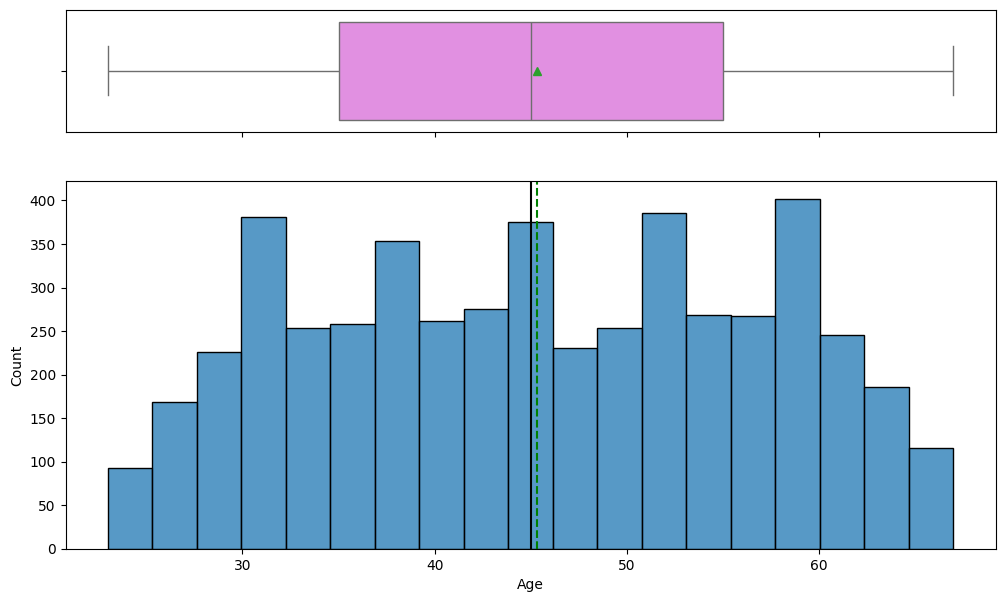

In [ ]:
# Generate a histogram and box plot on distribution of the Age continuous variable
histogram_boxplot(data, "Age")

**Observations**
* Age appears to follow a normal distribution.
* Both the median and mean age is around 45 years old.
* There are no outlier ages detected by the boxplot.

####Experience

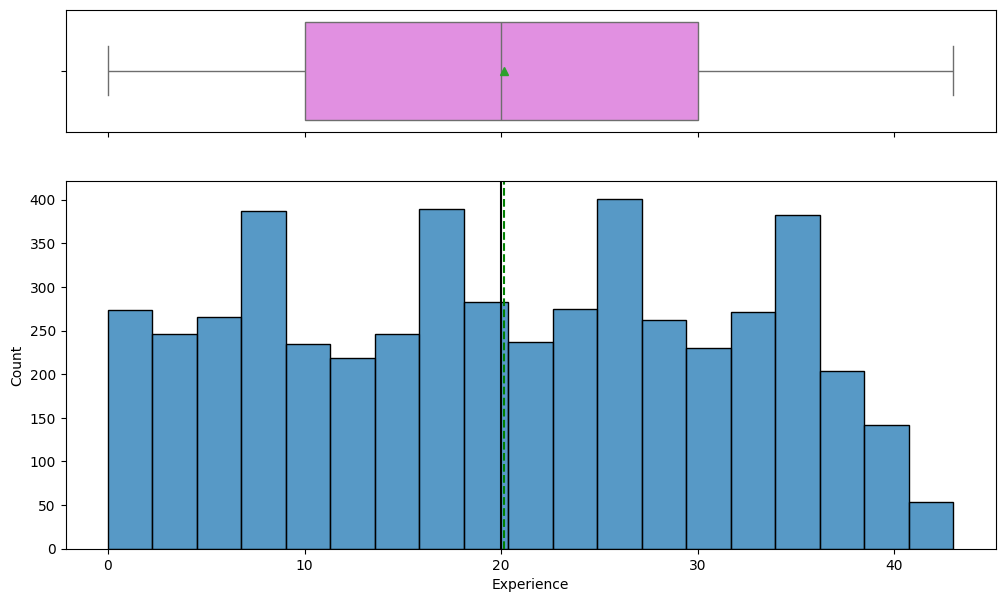

In [ ]:
# Generate a histogram and box plot on distribution of the Experience continuous variable
histogram_boxplot(data, "Experience")

**Observations**
* Experience appears to follow a slightly right-skewed distribution, with more records at the lower end of the experience range.
* Both the median and mean years of experience are 20 years.
* There are no outlier years of experience detected by the boxplot.

####Income

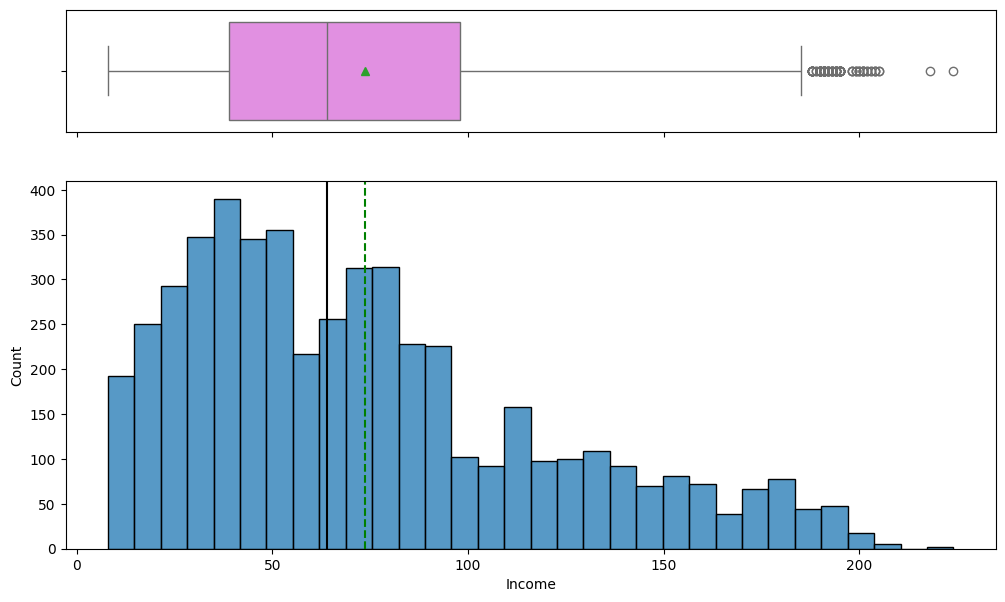

In [ ]:
# Generate a histogram and box plot on distribution of the Income continuous variable
histogram_boxplot(data, "Income")

**Observations**
* Income is a right skewed distribution, with a low number of records with much higher levels of income than the average.
* The median level of income is approx.  \$64k. The mean level of income is skewed higher than the median by the small number of high income records.

In [ ]:
# Print the mean and median income values of records in the data set

print('Mean income: $' + str(round(data['Income'].mean(), 2)) + 'k')
print('Median income: $' + str(round(data['Income'].median(), 2)) + 'k')

Mean income: $73.77k
Median income: $64.0k


* The right skew of the data causes the mean income value to be almost \$10k higher than the median income value.
* The box plot also demonstrates a number of outliers in the data set that are higher than the upper bound whisker of the box plot.
  * These outliers will be reviewed further as part of data preprocessing activities, and an appropriate outlier treatment action selected.

#### Family

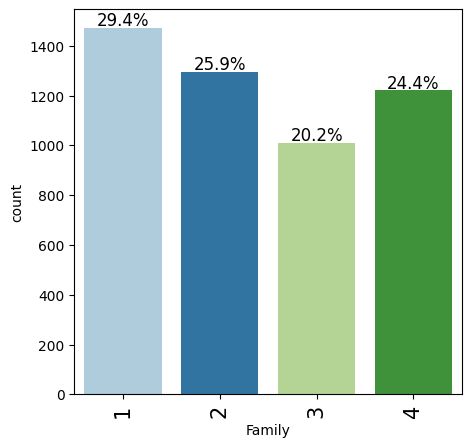

In [ ]:
# Generate a labeled bar plot on distribution of the Family continuous variable
# Note - as there are only 4 possible Family values, a bar plot is more appropriate visualization for this variable
labeled_barplot(data, "Family", perc=True)

**Observations**
* All records are made up of between 1 and 4 family members.
* The highest proportion of customers in the data set (29.4%) have only 1 family member.
* The lowest proportion of customers in the data set (20.2%) have 3 family members.
  * Surprisingly, there are more customers with 4 family members (24.4%) than 3 family members.

#### Credit Card average spend

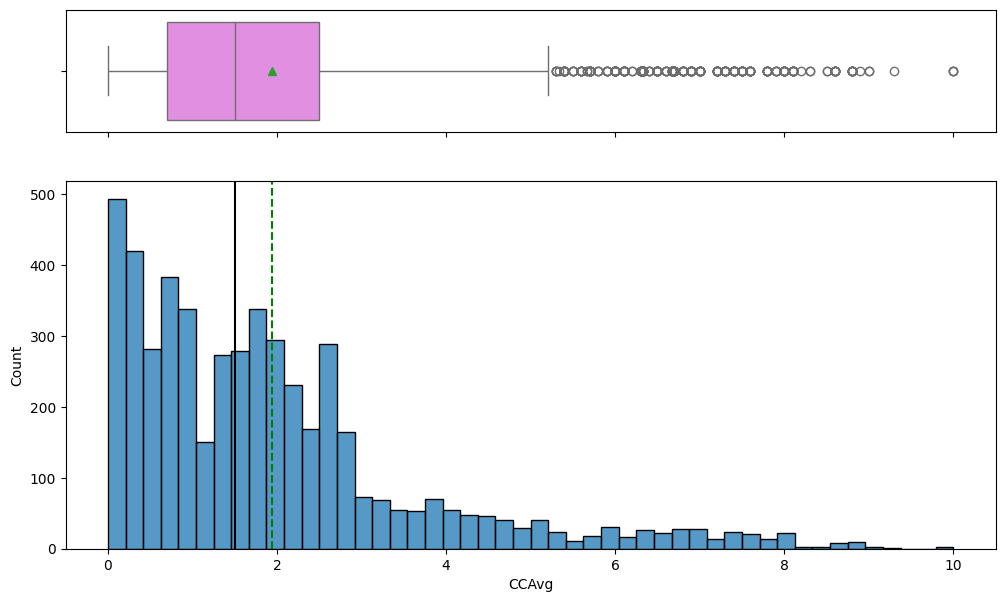

In [ ]:
# Generate a histogram and box plot on distribution of the CCAvg continuous variable
histogram_boxplot(data, "CCAvg")

**Observations**
* Like Income, CCAvg is a right skewed distribution, with a low number of records with much higher levels of monthly credit card spend than the average.
* The median level of monthly credit card spend is under \$2k. The mean level of monthly credit card spend is skewed higher from the median by the small number of high spend records.

In [ ]:
# Print the mean and median monthly credit card spend values of records in the data set

print('Mean monthly CC spend: $' + str(round(data['CCAvg'].mean(), 2)) + 'k')
print('Median monthly CC spend: $' + str(round(data['CCAvg'].median(), 2)) + 'k')

Mean monthly CC spend: $1.94k
Median monthly CC spend: $1.5k


* The right skew of the data causes the mean monthly credit card spend to be almost \$400 higher than the median monthly spend.
* The box plot also demonstrates a number of outliers in the data set that are higher than the upper bound whisker of the box plot.
  * These outliers will be reviewed further as part of data preprocessing activities, and an appropriate outlier treatment action selected.

####Education

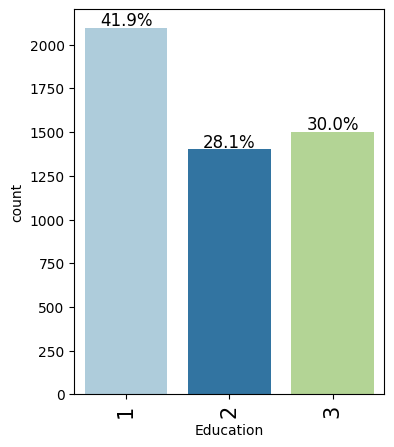

In [ ]:
# Generate a labeled bar plot on distribution of the Education categorical variable
labeled_barplot(data, "Education", perc=True)

**Observations**
* The highest proportion of the data set (41.9%) is made up of customers with only an undergraduate level of education.
* The lowest proportion of the data set (28.1%) is made up of customers with a graduate level of education.
  * Surprisingly, there are more records with an advanced/professional level of education (30.0%).

####Mortgage value

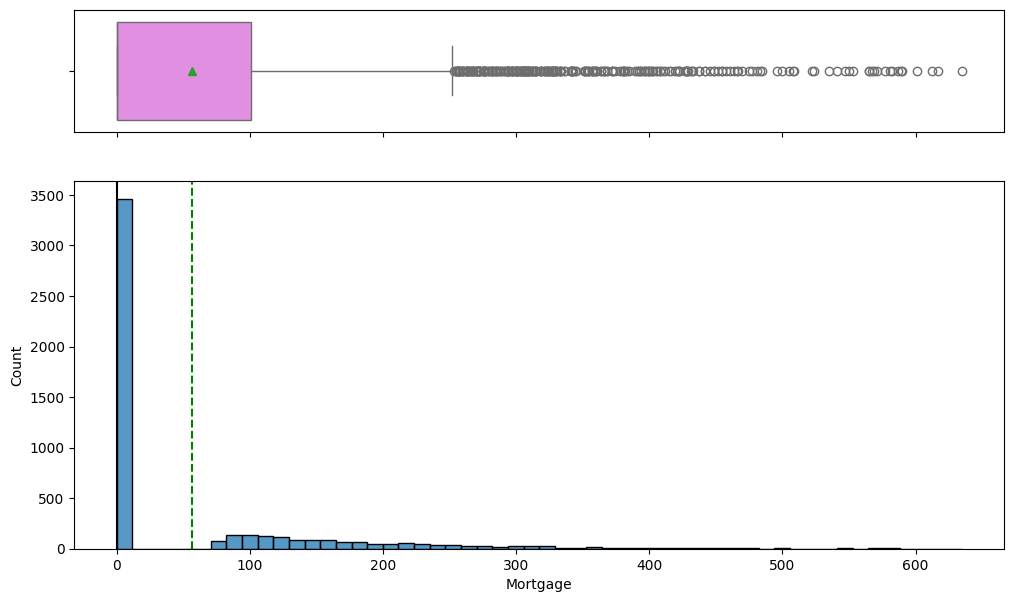

In [ ]:
# Generate a histogram and box plot on distribution of the Mortgage continuous variable
histogram_boxplot(data, "Mortgage")

**Observations**
* Mortgage value is a highly right-skewed distribution.
  * Almost 3,500 records have a mortgage value of 0, suggesting these customers either do not have a mortgage have fully paid off their mortgages.
* The median mortgage value is practically 0. The mean mortgage value is skewed higher from the median by the small number of customers who do have a high balance mortgage.

In [ ]:
# Print the mean and median mortgage values of records in the data set, in thousands of dollars

print('Mean mortgage value: $' + str(round(data['Mortgage'].mean(), 2)) + 'k')
print('Median mortgage value: $' + str(round(data['Mortgage'].median(), 2)) + 'k')

Mean mortgage value: $56.5k
Median mortgage value: $0.0k


* The mean mortgage value is \$56.5k, while the median is 0.
* The box plot also displays a contiguous stream of outliers in the data set that are higher than the upper bound whisker of the box plot.
  * These outliers will be reviewed further as part of data preprocessing activities, and an appropriate outlier treatment action selected.

####Securities accounts

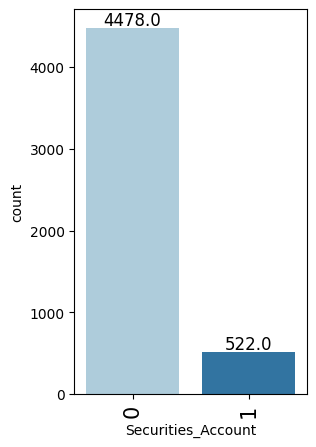

In [ ]:
# Generate a labeled bar plot on distribution of records with a Securities_Account flag
labeled_barplot(data, "Securities_Account", perc=False)

**Observations**
* Only 522 of the 5,000 customers in the data set have a Securities Account.

####Certificate of Deposit

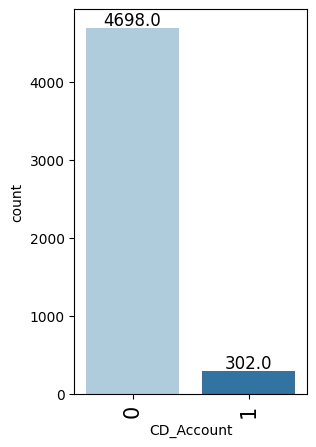

In [ ]:
# Generate a labeled bar plot on distribution of records with a CD_Account flag
labeled_barplot(data, "CD_Account", perc=False)

**Observations**
* Only 302 of the 5,000 customers in the data set have a Certificate of Deposit with the bank.

####Online banking

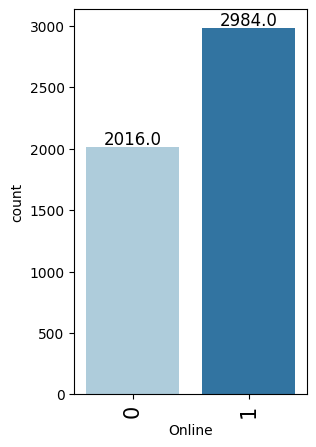

In [ ]:
# Generate a labeled bar plot on distribution of records with an Online flag
labeled_barplot(data, "Online", perc=False)

**Observations**
* More than half the customers in the data set (2,984, approx. 60%) have made use of online banking services.
* There are still a sizeable proportion (2,016, approx. 40%) of customers in the data set who do not use online banking services.

####Credit cards

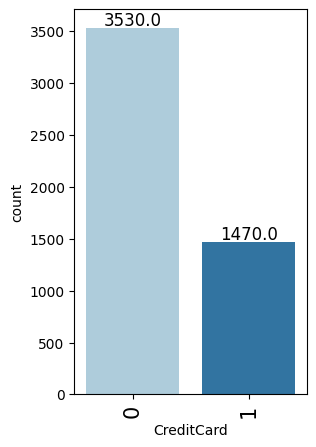

In [ ]:
# This code will generate a labeled bar plot on distribution of records with a Credit Card flag
labeled_barplot(data, "CreditCard", perc=False)

**Observations**
* Only 1,470 customers in the data set (approx. 30%) have been issued credit cards by other banks.
* The majority of customers (3,530, approx 70%) of customers have no credit cards issued by other banks.
  * This suggests that either they only bank solely with AllLife Bank, or that they do not own credit cards due to choice or lack of creditworthiness.

#### ZIP Code / County

As part of Step 3 of the data preprocesing, the [`uszipcode`](https://pypi.org/project/uszipcode/) library was used to convert all ZIP code values to one of 39 county values.

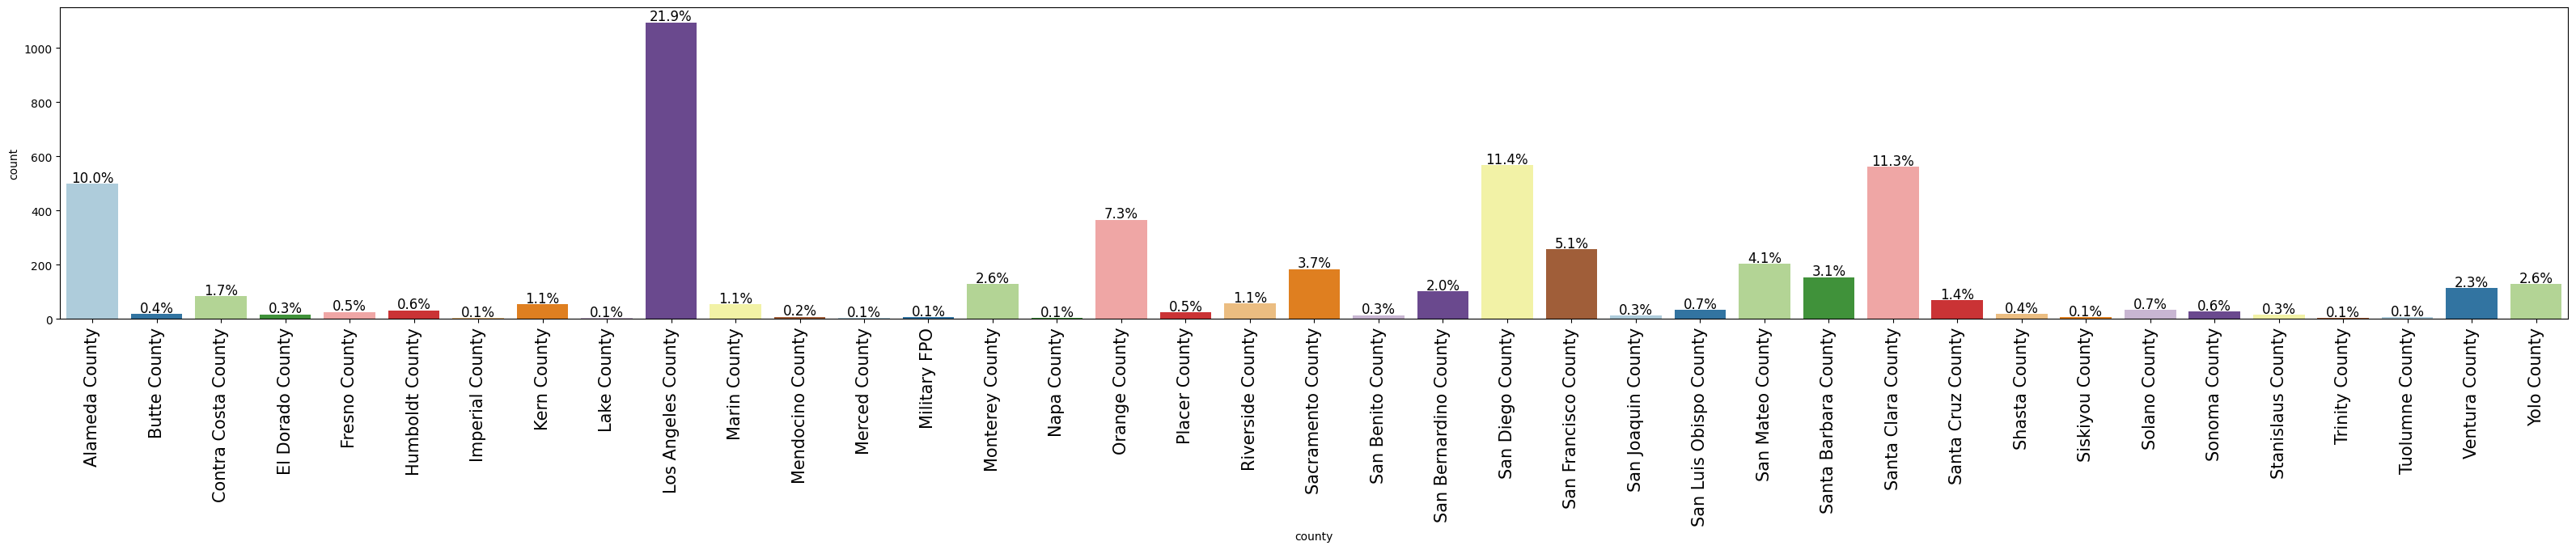

In [ ]:
# Generate a labeled bar plot on distribution of counties
labeled_barplot(data, "county", perc=True)

**Observations**
* Looking across all counties, the highest proportion of records (21.9%) in the data set belonged to customers with ZIP codes in Los Angeles County.
*  Alameda, Orange, San Diego, San Francisco and Santa Clara counties also each made up at least 5% of the ZIP codes in the data set.
* The rest of the results are split between counties that make up \<5% of the ZIP codes data set, suggesting a wide geographic distribution of customers.
  * There are 8 counties represented by only a single record (0.1%) in the data set, suggesting these are either rural counties with a low population or areas with very limited market penetration by AllLife Bank.

###Bivariate analysis

####Correlation check - continuous variables

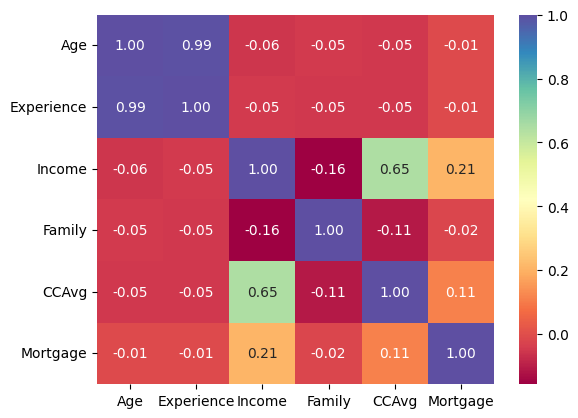

In [ ]:
# Generate a heat map of correlation between numeric values in the data set
sns.heatmap(data.drop(columns=['Personal_Loan']).corr(numeric_only=True), annot=True, fmt=".2f", cmap="Spectral");

**Observations**
* There is an almost perfect positive correlation between Age and Experience, suggesting that one of these variables could be removed without significant impact on the data model.
* There are positive correlations between Income and CCAvg, as well as between Income and Mortgage.
  * This suggests that customers with higher Income are also likely to spend more.
  * Mortgage spend and CCAvg spend are also slightly positively correlated as a result.
* There is a slight negative correlation between Family and Income, and Family and CCAvg.
  * This suggests that larger families have a lower Income than smaller families, and as a result spend less on credit card purchases.
* All othe numerical attributes have a correlation of less than 0.1 or -0.1, suggesting a neglible correlation relationship between them.

####Correlation check - Personal Loans vs other values

In [ ]:
# Output correlation value of Personal Loan flag against all other non-string variables
data.drop(columns=['county']).corr()['Personal_Loan'].sort_values(ascending=False)

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Experience           -0.008304
Name: Personal_Loan, dtype: float64

**Observations**
* Income is highly positively correlated with issuance of personal loans, suggesting that high income customers are most likely to take a personal loan from the Bank.
* CCAvg spend and presence of CD_Accounts are also somewhat positively correlated, suggesting customers with higher credit card spend or Certificates of Deposit with the bank are more likely to take a personal loan.
* Mortgage value and level of Education are very slightly positively correlated with the likelihood of a customer taking a personal loan.
* All other attributes have a correlation of less than 0.1 or -0.1, suggesting a neglible impact on the likelihood of a customer taking a personal loan.

####Pairplot of continuous variables

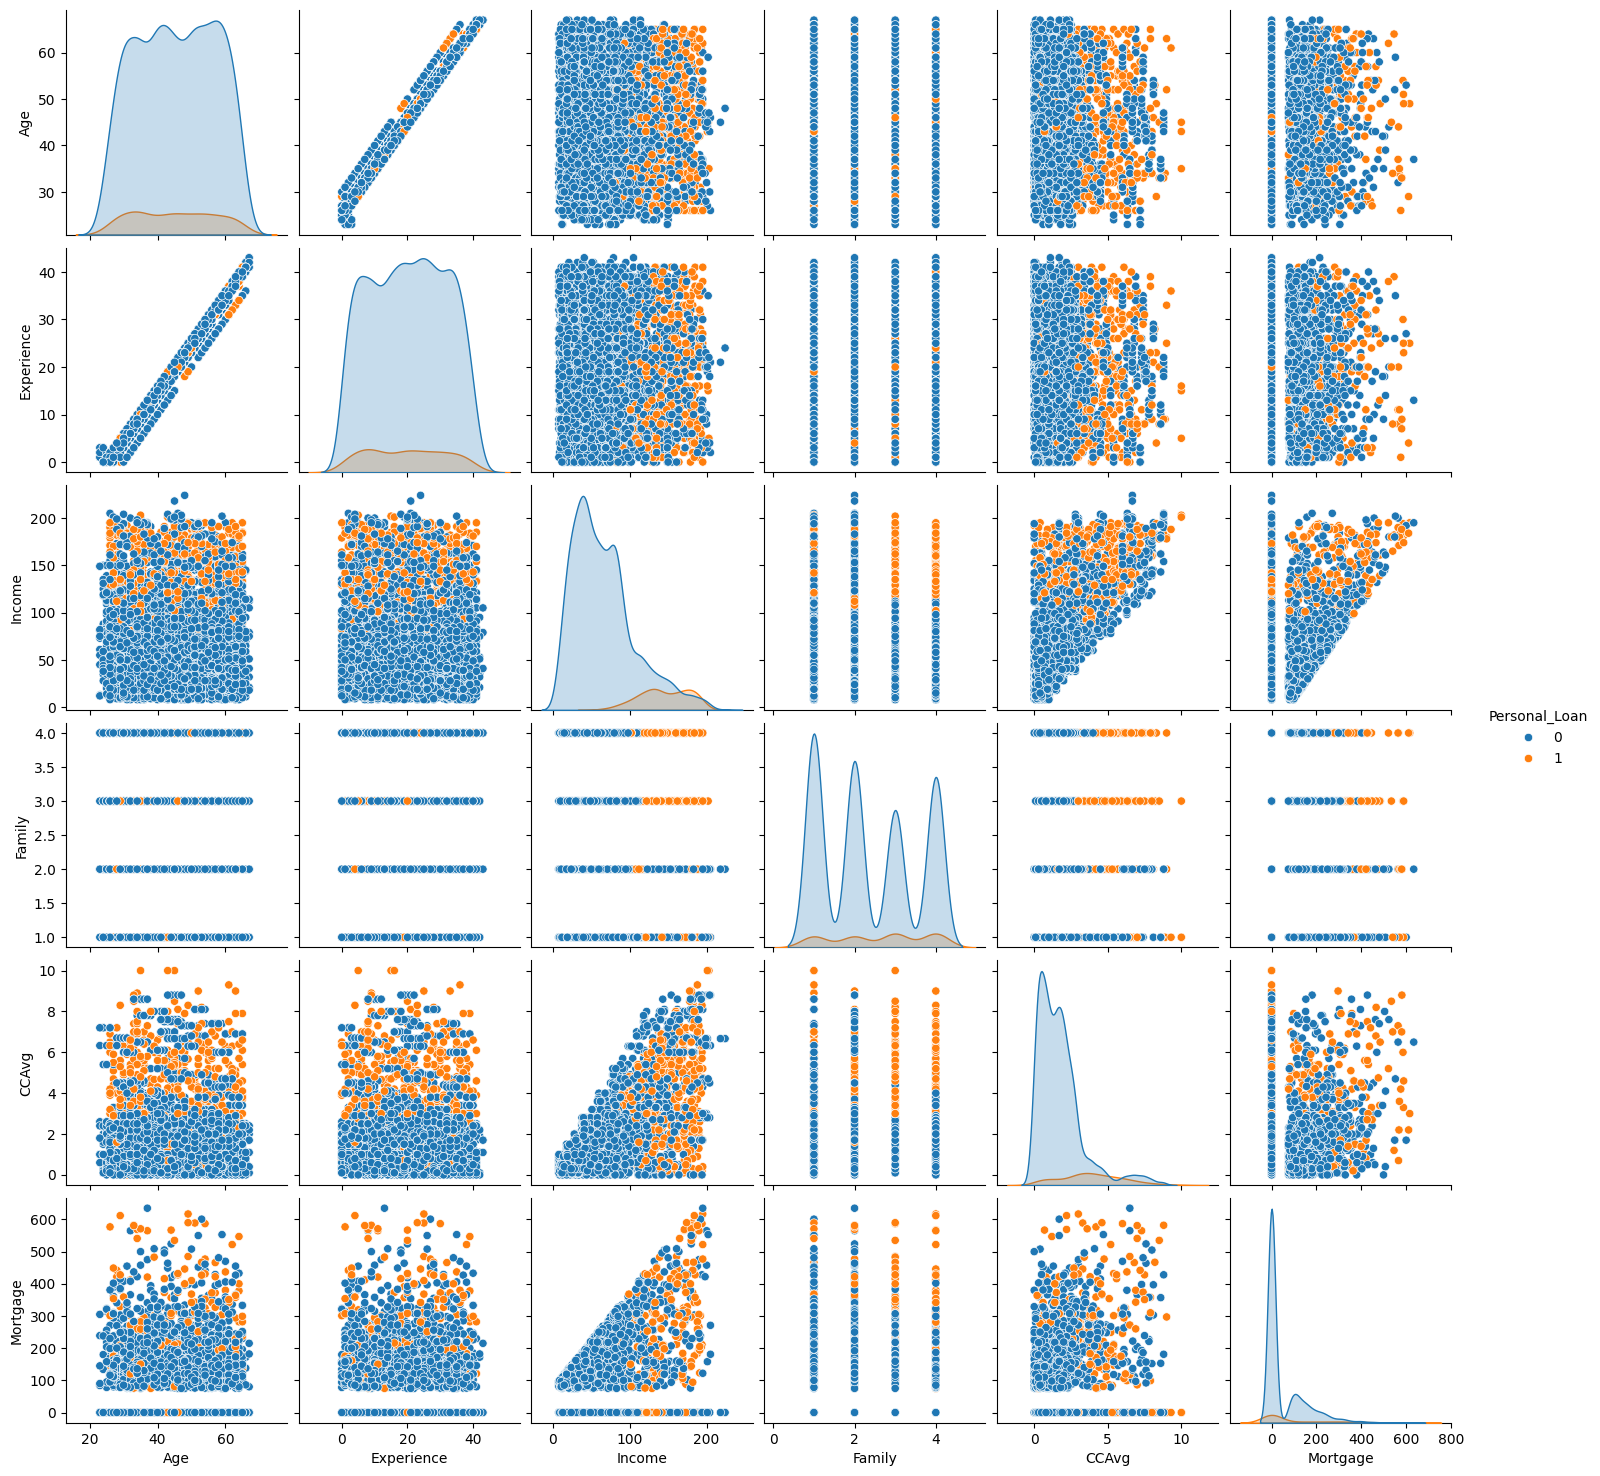

In [ ]:
# Generate a pair plot comparing all combinations of continuous variables across the data set, with data points highlighted by personal loan status
sns.pairplot(data, hue='Personal_Loan');

**Observations**
* Customers who take out personal loans appear more frequently in the top half of the Income and CCAvg data distributions.
* The pairplot confirms that Income is positively correlated with both CCAvg and Mortgage.
* The pairplot confirms that Age and Experience are almost perfectly positively correlated.
* Customers of all Experience levels, Family sizes and Age brackets appeared to take personal loans.

####Age vs Personal Loans

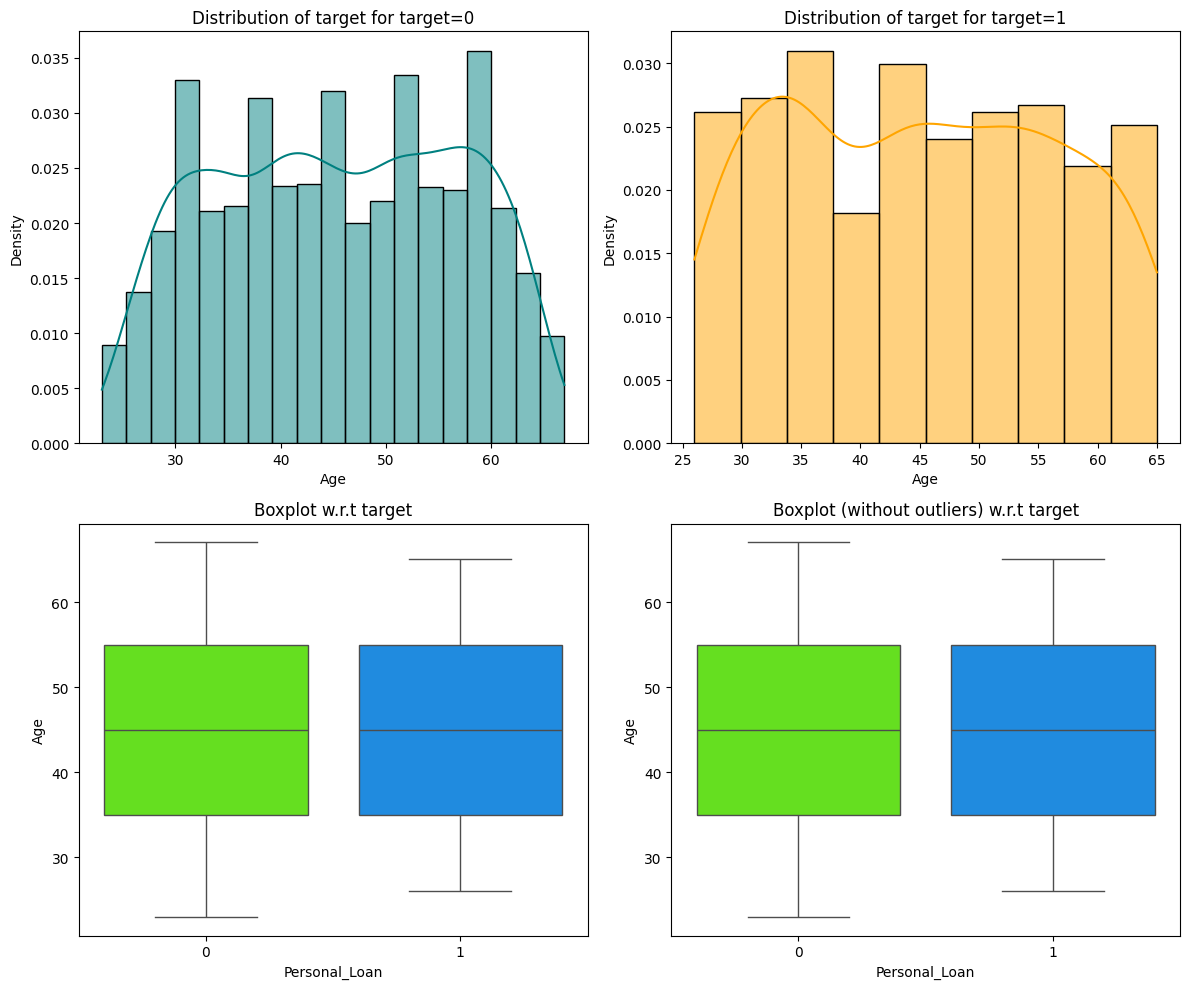

In [ ]:
# Output a histogram and box plot showing the distribution of customers who take personal loans or not, broken down by age
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**Observations**
* Personal loan applicants are evenly spread between all age groups.
* Younger (\<30 years old) and older (\>60 years old) customers appear more likely to take a personal loan than the general population as a whole.

####Experience vs Personal Loans

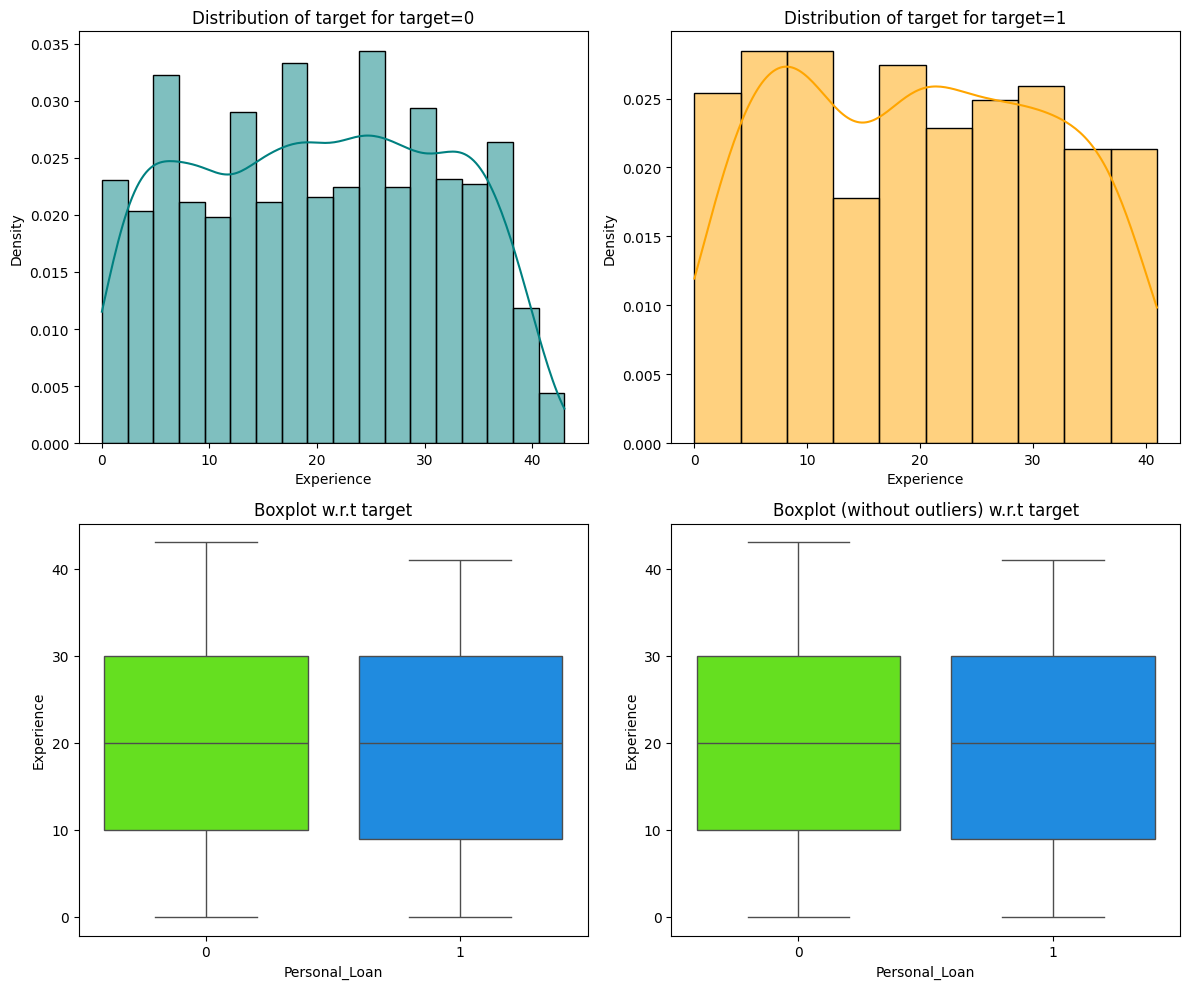

In [ ]:
# Output a histogram and box plot showing the distribution of customers who take personal loans or not, broken down by years of experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

**Observations**
* Personal loan applicants are evenly spread between all experience groups.
  * This mirrors the distribution of personal loan applications based on age bracket, which makes sense as Age and Experience are almost perfectly correlated.
* More experienced customers (>35 years of experience) appear more likely to take a personal loan than the general population as a whole.

####Income vs Personal Loans

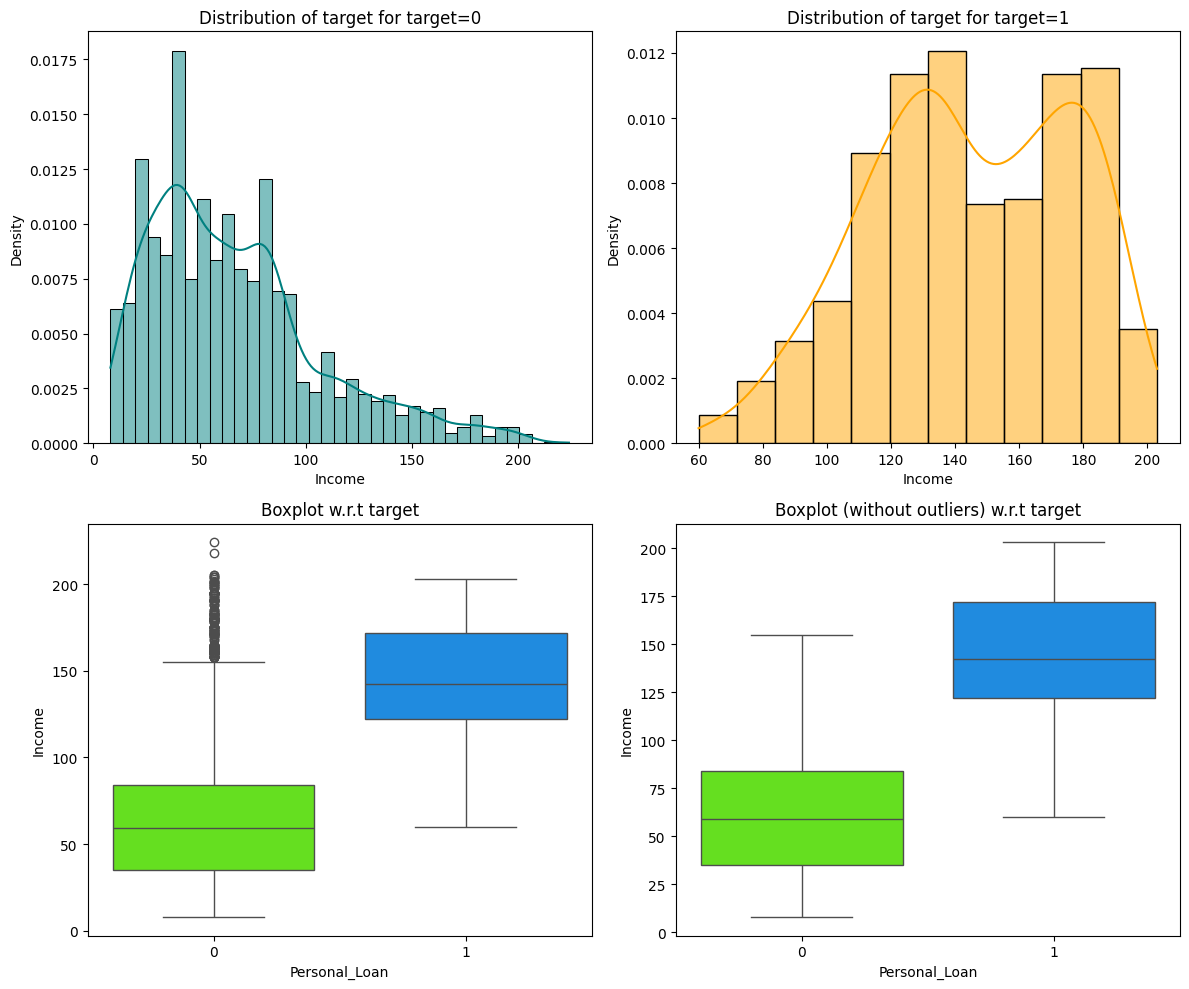

In [ ]:
# Output a histogram and box plot showing the distribution of customers who take personal loans or not, broken down by income
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

**Observations**
* Customers with an income of <\$95k appear far less likely to take a personal loan than customers with incomes above this value.
  * There are outliers here, as the box plot demonstrates that there are customers with a high incomes of >\$150k who also do not have personal loans.
* Even after removing outliers, 75% of personal loan applicants had an income of approx. \$125k or higher.
  * No customers with an income of below approx. $60k have taken a personal loan.

####Family size vs Personal Loans

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


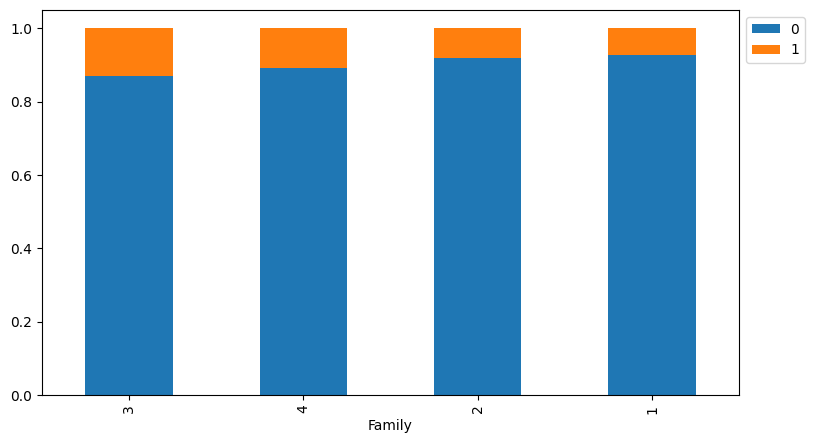

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by Family size
stacked_barplot(data, "Family", "Personal_Loan");

**Observations**
* Customers with a larger Family size are more likely to take out a personal loan than customers with a Family size of 2 or less.

####Monthly credit card spend vs Personal Loans

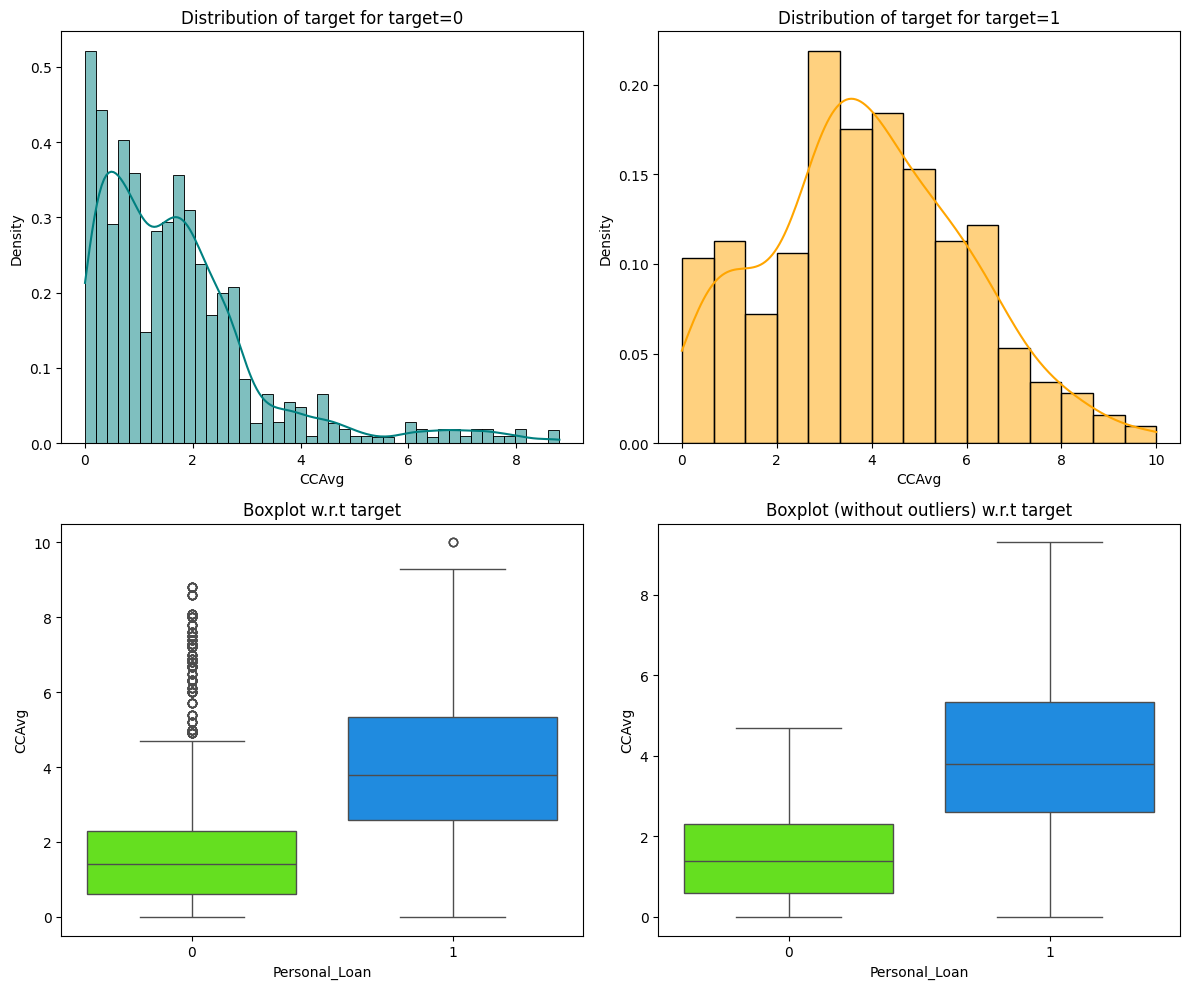

In [ ]:
# Output a histogram and box plot showing the distribution of customers who take personal loans or not, broken down by monthly credit card spend
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Customers with monthly credit card spend of <\$3k appear far less likely to take a personal loan than customers with monthly spend above this value.
  * There are outliers here, as the box plot demonstrates that there are customers with a high monthly credit card spend of >\$4k who also do not have personal loans.
* Even after removing outliers, 75% of personal loan applicants had a monthly credit card spend of approx. \$2.5k or higher.
  * Uptake of personal loans is spread across the full range of monthly credit card spend values, from 0 to up to \$10k.


####Education vs Personal Loans

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


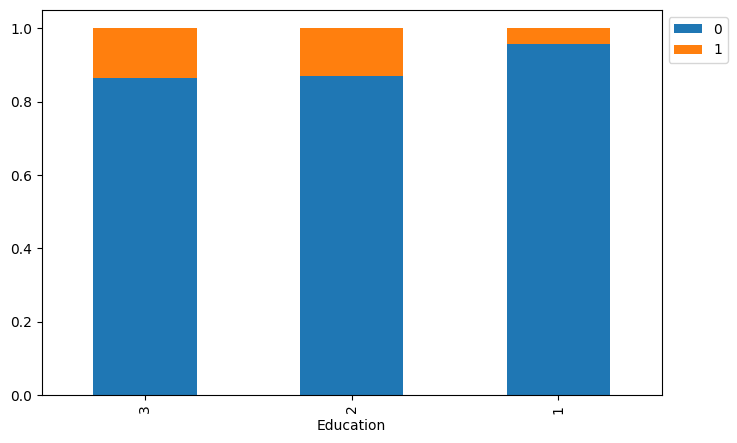

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by level of Education
stacked_barplot(data, "Education", "Personal_Loan");

**Observations**
* Customers with a Graduate level of education or higher are more than twice as likely to take personal loans than customers with only an undergraduate level of education.

####Mortgage value vs Personal Loans

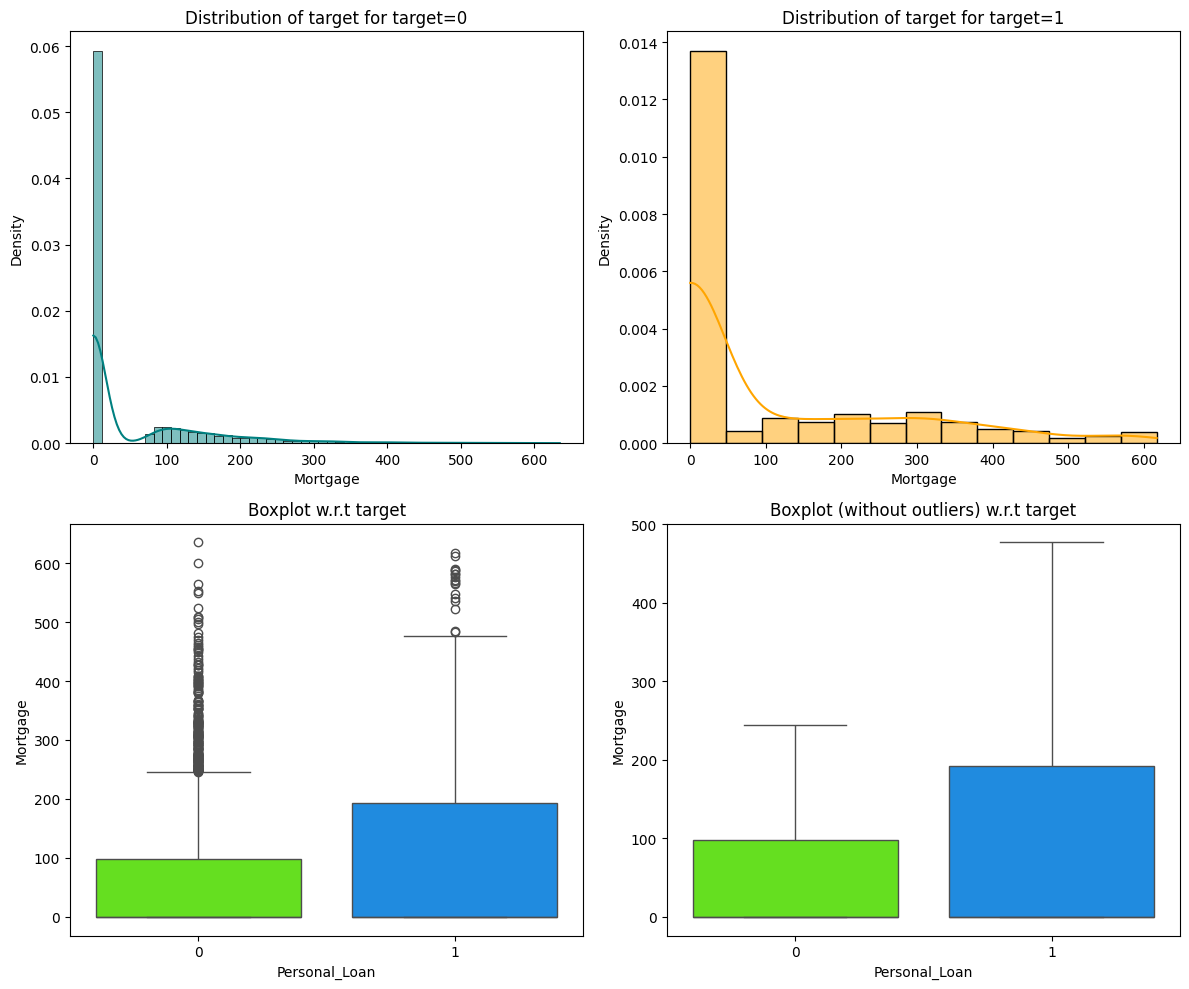

In [ ]:
# Output a histogram and box plot showing the distribution of customers who take personal loans or not, broken down by mortgage value
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

**Observations**
* Customers with mortgages appear *slightly* more likely to take personal loans than customers without mortgages.
* At least 25% of personal loan applicants had mortgage values of >$200k.
  * There are outliers here, as the box plot demonstrates that there are customers with high mortgage balances of >\$250k who also do not have personal loans.
  *   Uptake of personal loans is spread across the full range of mortgage values, from 0 to >\$600k.

####Securities Account vs Personal Loans

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


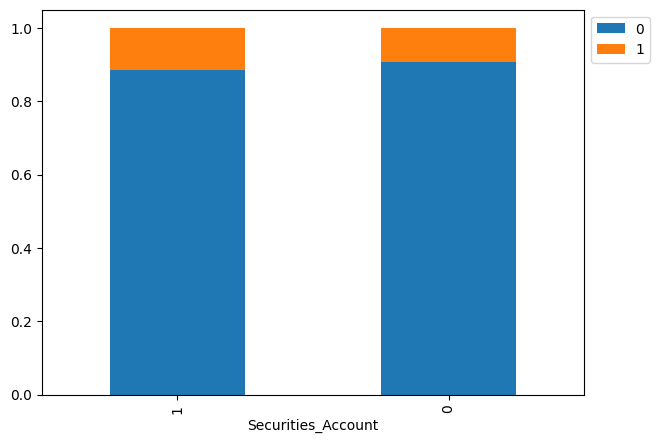

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by if they have a Securities Account with the bank
stacked_barplot(data, "Securities_Account", "Personal_Loan");

**Observations**
* Customers with a securities account were only *slightly* more likely to take a personal loan.

####Certificate of Deposit vs Personal Loans

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


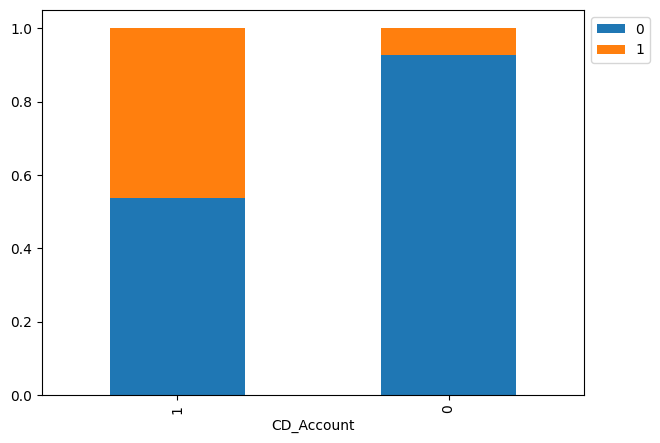

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by if they have a Certificate of Deposit with the bank
stacked_barplot(data, "CD_Account", "Personal_Loan");

**Observations**
* Customers with a Certificate of Deposit with the bank appear significantly more likely to take personal loans than customers who do not.
* Approx 45% of customers with a Certificate of Deposit also have a Personal Loan with the bank.

####Online activity vs Personal Loans

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


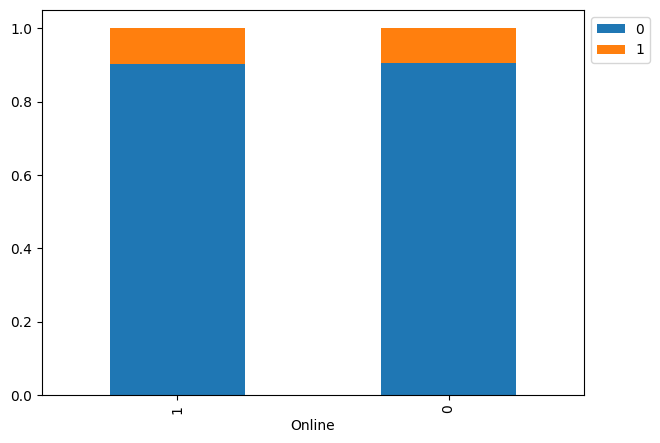

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by if they use online banking facilities with the bank
stacked_barplot(data, "Online", "Personal_Loan");

**Observations**
* There appears to be no signficant difference in the proportion of customers who take a personal loan based on whether or not they use online banking facilities.

####Credit Card issued vs Personal Loans

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


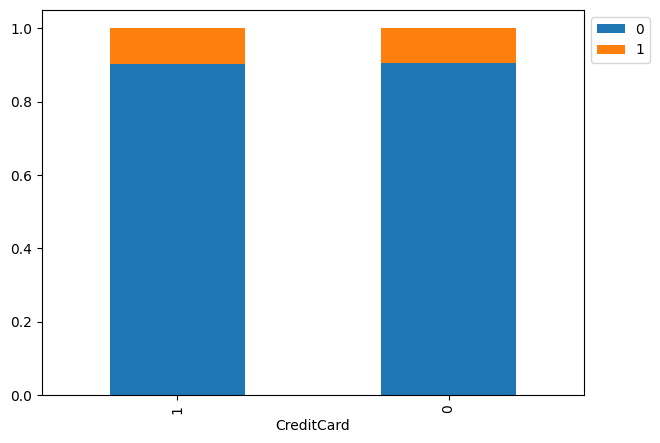

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by if they have been issued a credit card by another bank
stacked_barplot(data, "CreditCard", "Personal_Loan");

**Observations**
* There appears to be no signficant difference in the proportion of customers who take a personal loan based on whether or not they use a credit card issued by another bank.

####ZIPCode / County vs Personal Loans

Personal_Loan              0    1   All
county                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            333   33   366
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
San Mateo County         192   12   204
Contra Costa County       73   12    85
Santa Barbara County     143   11   154
Ventura County           104   11   115
Yolo County              122    8   130
Santa Cruz County         60    8    68
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Solano County             30    3    33
San Bernardino County     98    3   101
Shasta County             15    3    18


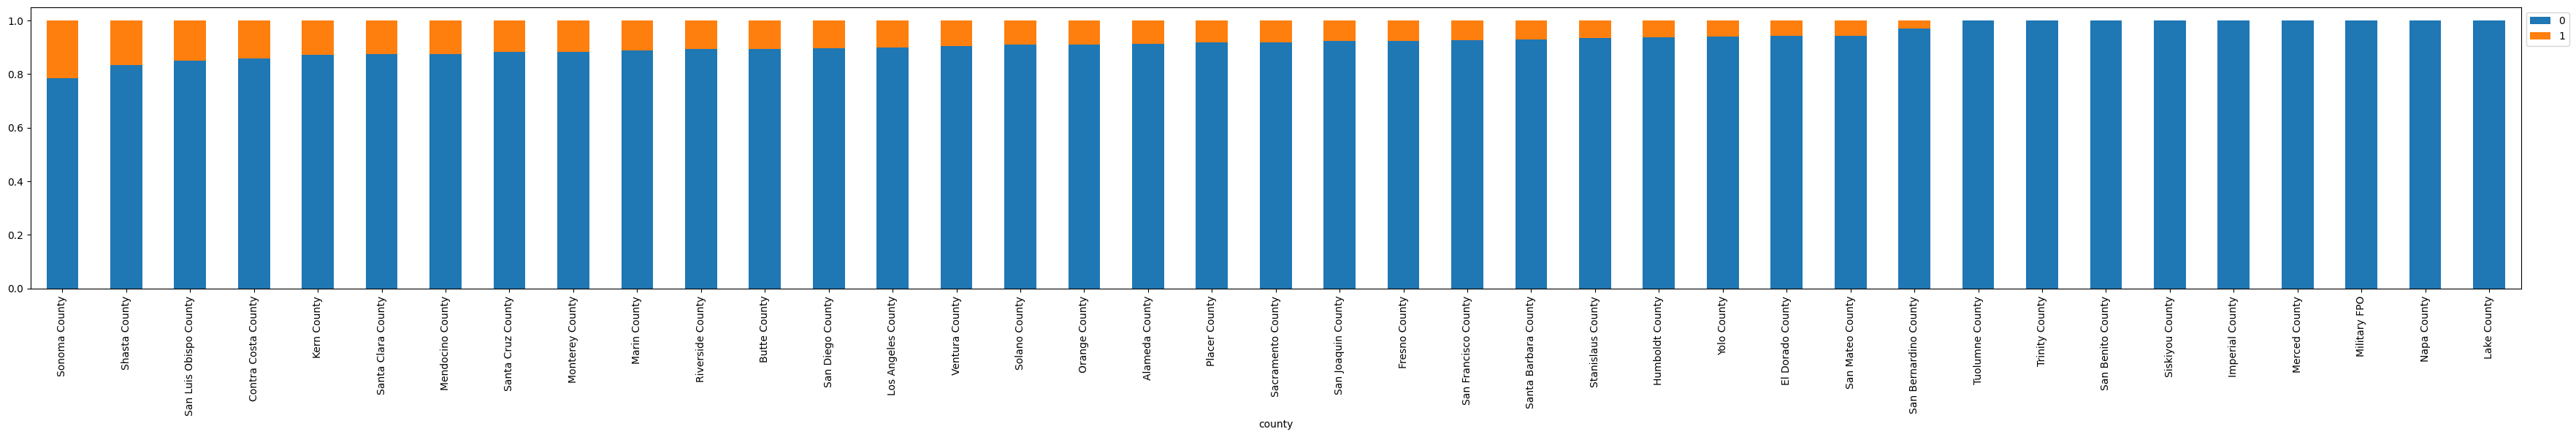

In [ ]:
# Output a stacked barplot showing the proportion of customers who take a Personal Loan broken down by county, as obtained from their ZIP code
stacked_barplot(data, "county", "Personal_Loan");

**Observations**
* There are 9 counties where 0 customers have taken out a personal loan, but each of these counties has a neglible (\<15) number of total customers with the bank.
* Sonoma has the highest proportion of customers who have taken out personal loans with the bank (>20%), but due to the small market size this only accounts for 6 loan customers.
* In Los Angeles, the county with the highest number of total customers, approx. 10% of customers have taken a loan with the bank, reflecting the proportion of customers who have taken a loan across the entire data set.

## Data Preprocessing (cont'd)

###Step 5 - Outlier detection and treatment decision

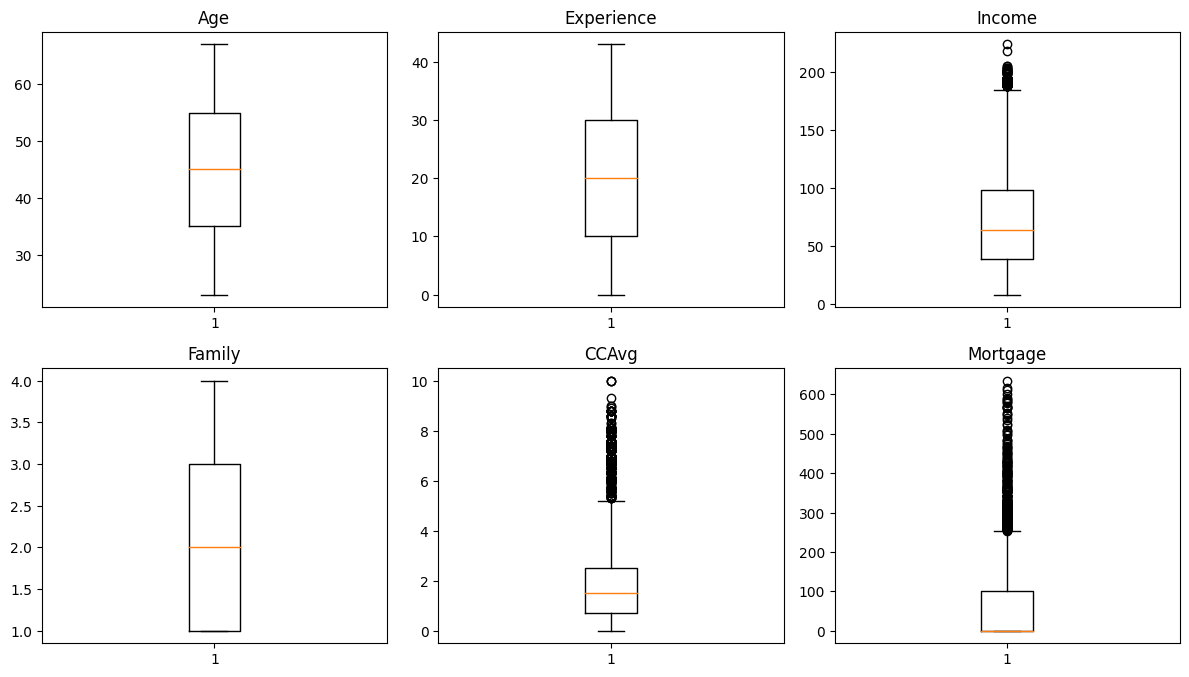

In [ ]:
# Identify all independent numeric variable fields from the data set and outputs to a list
numeric_columns = data.drop('Personal_Loan', axis=1).select_dtypes(include=np.number).columns.tolist()

# Create a box plot for each numeric variable, to determine if outliers are present
plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The box plots above demonstrate that the Income, CCAvg and Mortgage attributes all have a number of outlier values that exceed the upper bound whisker values of each box plot, and should be considered for treatment.

In [ ]:
# Create a DataFrame to capture outlier distribution details
outlier_df = pd.DataFrame(columns=['attribute', 'upper_bound', 'max_value', 'number_of_outliers', 'percentage_outliers'])

# Iterate through each variable to calculate outlier threshold and number of values above threshold
for i in numeric_columns:
  Q1 = data[i].quantile(0.25)  # To find the 25th percentile and 75th percentile.
  Q3 = data[i].quantile(0.75)

  IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

  # Finding upper bounds for all values. All values outside these bounds are outliers
  upper = (Q3 + 1.5 * IQR)

  # Outputting details of outlier distribution for each variable to a DataFrame
  append_df = pd.DataFrame([[i, upper, max(data[i]), sum(data[i]>upper), (sum(data[i]>upper)/len(data[i]))*100]],
                           columns=['attribute', 'upper_bound', 'max_value', 'number_of_outliers', 'percentage_outliers'])
  outlier_df = pd.concat([outlier_df, append_df], ignore_index=True)

outlier_df

attribute  upper_bound max_value number_of_outliers  percentage_outliers
0         Age         85.0        67                  0                 0.00
1  Experience         60.0        43                  0                 0.00
2      Income        186.5       224                 96                 1.92
3      Family          6.0         4                  0                 0.00
4       CCAvg          5.2      10.0                324                 6.48
5    Mortgage        252.5       635                291                 5.82

Reviewing the numerical variables, the following outlier ranges were identified:
* 1.92% of Income variable values are outliers above the upper bound of \$186.5k, with a maximum value of \$224k.
* 6.48% of CCAvg variable values are outliers above the upper bound of \$5.2k, with a maximum value of \$10k.
* 5.82% of Mortgage values are outliers above the upper bound of \$252.5k, with a maximum value of \$635k.

**Outlier treatment decision**

Based on the maximum values identified here, these outliers **will not** be treated, and will be left in the model data set.

The outlier and maximum values identified for the Income, CCAvg and Mortgage values appear reasonable, and representative of values that may be encountered as part of day-to-day activities at the Bank. Removing these values may lead to underfitting in the data model, and sample bias in the data set.

###Step 6 - Eliminating multicollinear Age and Experience variables

As part of Correlation Check performed during EDA, it was noted that **Credit_Limit** is perfectly correlated with **Avg_Open_To_Buy**, suggesting they are not independent.

Including dependent variables in the data set could lead to a negative impact on the statistical significance of both variables in the data set, and the effectiveness of any models built from the data.

To address this, one of the colinear variables will be dropped from the data set before it is used for model building.

In [ ]:
# Dropping the Avg_Open_To_Buy variable from the data set, because it is multicollinear with Credit_Limit
data.drop('Avg_Open_To_Buy', axis=1, inplace=True)

data.info()

NameError: name 'data' is not defined

###Step 7 - Splitting data into test and train sets with dummy variables

The target variable to predict, Personal_Loan, first needs to be separated from the other predictor variables to a separate DataFrame.

In [ ]:
# Splitting Personal_Loan dependent variable from predictor variables
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']

Within the new predictor variable data set, the Education and County categorical variables will need to be split into dummy variables, so that each potential option has its own column.

In [ ]:
# Convert the Education and County variables into dummy variables, with one column per option
X = pd.get_dummies(X, columns=["Education", "county"], drop_first=True)
X = X.astype(float)

# Inspect the results
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   float64
 1   Income                         5000 non-null   float64
 2   Family                         5000 non-null   float64
 3   CCAvg                          5000 non-null   float64
 4   Mortgage                       5000 non-null   float64
 5   Securities_Account             5000 non-null   float64
 6   CD_Account                     5000 non-null   float64
 7   Online                         5000 non-null   float64
 8   CreditCard                     5000 non-null   float64
 9   Education_2                    5000 non-null   float64
 10  Education_3                    5000 non-null   float64
 11  county_Butte County            5000 non-null   float64
 12  county_Contra Costa County     5000 non-null   f

The predictor and target variable data sets now need to be further split into separate test and training data sets, with the same proportion of records in each set.

In [ ]:
# Splitting the two data sets into training and data sets, in a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Printing attributes of training and test data sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 49)
Shape of test set :  (1500, 49)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


Both the test and training data sets include a similar breakdown of approx. 10% of records with a Personal_Loan value of 1. This is important for model building, as there should be a similar distribution of positive and negative target variables in both test and train data sets.

## Model Building

### Model Evaluation Criterion - Recall

**Model can make wrong predictions as:**

* Failing to identify a good target customer for a loan marketing campaign.
  * This would be a **False Negative** result (FN) or a **Type 2 error**.
* Incorrectly targeting an inappropriate customer with a loan marketing campaign
  * This would be a **False Positive** result (FP) or a **Type 1 error**.

**Which case is more important?**

* The Bank faces a potential loss of loan interest income if they fail to target an appropriate customer with a loan marketing campaign (FN).
* The Bank may expend unnecessary marketing costs if they target an inappropriate customer with their loan marketing campaign (FP).

As the incremental cost of targeting an inappropriate customer with a marketing campaign is likely to be minimal, while the loss of loan interest income could be significant, the model will be evaulated on its ability to **minimize False Negative predictions**.

**How to minimize False Negatives?**

The **Recall** metric is appropriate for evaluating the ability of a model to maximize True Positive results, and minimize False Negative errors.

$Recall=\frac{TP}{TP+FN}$

###Model Evaluation Functions

The following functions have been provided to expedite the model evaulation process.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Model Building and Performance (sklearn default)

An initial Decision Tree Model using all available data can be built using the DecisionTreeClassifier function.

First the Model is fitted to the training data.

In [ ]:
# Create an instance of the DecisionTreeClassifier model
dtree1 = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Once fitted, the performance of the model against the training data set can be assessed based on the Recall value (its ability to minimize Fale Negative results).

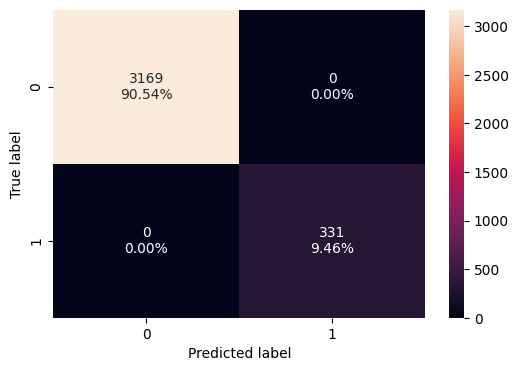

In [ ]:
# Create a confusion matrix to show model performance in predicting the Personal_Loan value in the training data set
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
# Display the performance metrics of the decision tree in predicting the Personal_Loan value in the training data set
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

On the training data set, the initial Decision Tree Model predicts all values with 100% accuracy, and shows a perfect Recall of 1.0.

This may change once the same model is evaluated against the test data set, which contains unseen data new to the model.

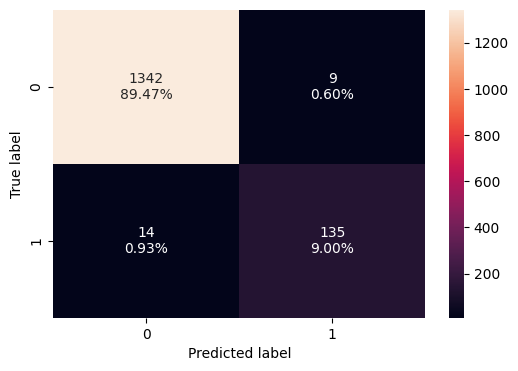

In [ ]:
# Create a confusion matrix to show model performance in predicting the Personal_Loan value in the test data set
plot_confusion_matrix(dtree1, X_test, y_test)

In [ ]:
# Display the performance metrics of the decision tree in predicting the Personal_Loan value in the test data set
dtree1_test_perf = model_performance_classification(dtree1, X_test, y_test)
dtree1_test_perf

Accuracy   Recall  Precision        F1
0  0.984667  0.90604     0.9375  0.921502

On the test data set, the Recall of the model has fell from 1.0 to 0.91. The confusion matrix shows the model predicted 14 False Negatives and 9 False Positives on the test data set.

This suggests that this initial model may be **overfitting** on the training data set, by creating a model too complex to be applied to the unseen test data effectively. This overfitting can be addressed by pruning the decision tree.

###Feature Importance (sklearn default)

The importance of each variable in the data set to determining the Predictor result from this Decision Tree can be determined by calculating the Gini importance of each variable.

In [ ]:
# Output a DataFrame showing the Gini importance of each variable in this Decision Tree

print(
    pd.DataFrame(
        dtree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.313387
Family                         0.251867
Education_2                    0.168643
Education_3                    0.147210
CCAvg                          0.053985
Age                            0.031845
CD_Account                     0.017273
county_Ventura County          0.004087
county_Riverside County        0.003544
Online                         0.002224
county_Monterey County         0.001668
county_San Francisco County    0.001608
county_Santa Barbara County    0.001422
county_Los Angeles County      0.001236
county_Butte County            0.000000
county_Shasta County           0.000000
county_San Joaquin County      0.000000
county_San Luis Obispo County  0.000000
county_San Mateo County        0.000000
county_Santa Clara County      0.000000
county_Santa Cruz County       0.000000
county_Siskiyou County         0.000000
county_San Bernardino County   0.000000
county_Solano County           0.000000


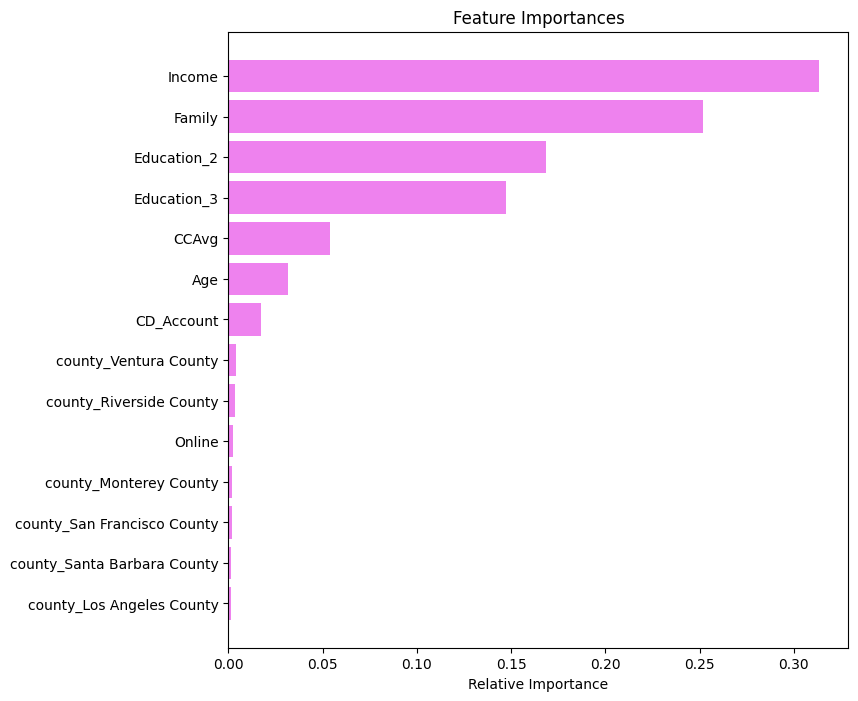

In [ ]:
# Get the feature names from the training data
feature_names = X_train.columns

# Export the Gini importance values of each feature from the default Decision Tree model
importances = dtree1.feature_importances_
indices = np.argsort(importances) # Order from highest to lowest


# Filter both indices and importances to keep only non-zero values
non_zero_indices = indices[importances[indices] != 0]
non_zero_importances = importances[non_zero_indices]

# Create a figure to plot the feature importances on
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")

# Use the filtered arrays for plotting
plt.barh(range(len(non_zero_importances)), non_zero_importances, color="violet", align="center")
plt.yticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices])

plt.xlabel("Relative Importance")
plt.show()

This bar chart shows that this default Decision Tree model considers Income, Family and Education as the most impactful features when predicting if a customer will take on a Personal Loan or not.

Of the 38 different county features in the data set, only 6 counties are considered as having any relative importance. If a customer is present in Ventura or Riverside county is treated as more important then whether or not the customer makes use of Online banking services.

###Model Visualization (sklearn default)

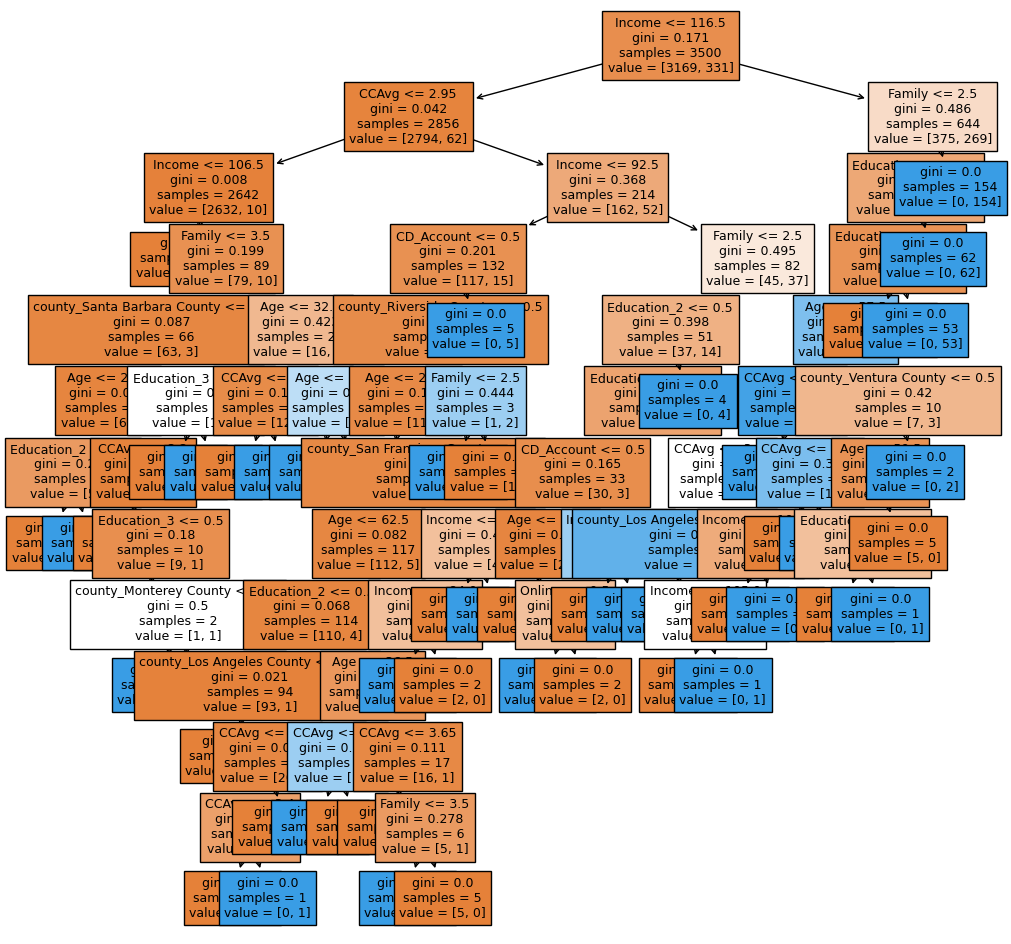

In [ ]:
# Create a figure to plot the decision tree visualization on
plt.figure(figsize=(12, 12))

# Plotting the unpruned decision tree
tree.plot_tree(dtree1, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None);

In [ ]:
# Printing a text report showing the rules of the unpruned decision tree
print(tree.export_text(dtree1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- county_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- county_Monterey County <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.0

This visualization shows that the initial decision tree is very complex, with a large  number of layers designed to predict the training data with 100% accuracy.

By pruning the Decision Tree, it may be possible to improve the performance when assessing unseen test data sets.

## Model Performance Improvement

###Pre-Pruning

One approach to improving the performance of the decision tree model on predicting the Personal_Loan value on unseen test data would be to set hyperparameters which limit the complexity of the tree before it is created.

This is known as **Pre Pruning**. Ranges of variables can be iterated over for maximum depth, maximum leaf node values and minimum sample split sizes to determine which combination generates the best Recall score on the test data set.

####Model Building (Pre Pruning)

In [ ]:
# Set ranges to iterate over to determine best hyperparameters for pre prnung the decision tree
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Variables are established to store details of the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced', # Necessary to handle imbalanced datasets such as this one
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


By iterating through a range of proposed hyperparamter variables, a Decision Tree Model which generated the best Recall score on the test data set has been identified.

In [ ]:
# Assign the best pre-pruned Decision Tree Model to the "dtree2" variable
dtree2 = best_estimator

####Model Performance (Pre Pruning)

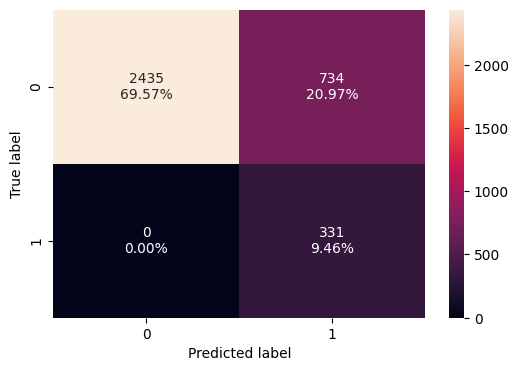

In [ ]:
# Create a confusion matrix to show pre-pruned model performance in predicting the Personal_Loan value in the training data set
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
# Display the performance metrics of the pre-pruned decision tree in predicting the Personal_Loan value in the training data set
dtree2_train_perf = model_performance_classification(dtree2, X_train, y_train)
dtree2_train_perf

Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212

On the training data set, the pre-pruned Decision Tree Model predicted 734 False Positives but no False Negatives. It showed a drastically reduced Recall score of 0.31 when compared to the unpruned Decision Tree.

The reduction in Pre-Pruned model Recall is expected, as the Pre Pruned Decision Tree has been prevented from growing to its full size, preventing certain decision nodes from generation.

The significant increase in False Postives is unsurprising, as the hyperparameters for the Pre-Pruned Decision Tree were selected based on their ability to minimize False Negatives through maximizing the Recall score. This has led to some loss of Precision in the model's ability to minimize False Positives.

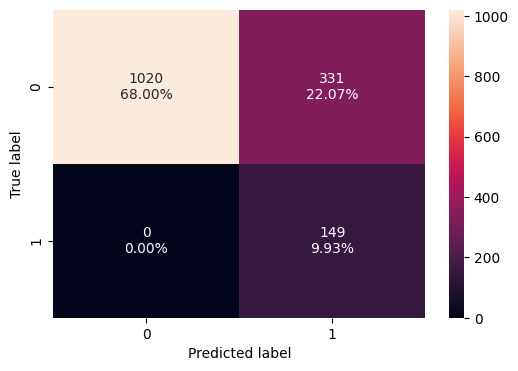

In [ ]:
# Create a confusion matrix to show pre-pruned model performance in predicting the Personal_Loan value in the test data set
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
# Display the performance metrics of the pre-pruned decision tree in predicting the Personal_Loan value in the test data set
dtree2_test_perf = model_performance_classification(dtree2, X_test, y_test)
dtree2_test_perf

Accuracy  Recall  Precision        F1
0  0.779333     1.0   0.310417  0.473768

On the test data set, the pre-pruned Decision Tree Model predicted 331 False Positives but again no False Negatives. It again gave a perfect Recall score of 1.0, when when compared to the Recall score of 0.93 generated on the test data by the unpruned Decision Tree.

This increase in Recall suggests that the unpruned Decision Tree was overfitting, leading to a reduction in performance when predicting against unseen test data. By pre-pruning the model, fewer unnecessary decision nodes are generated, and the pre-pruned model can predict True Positives on unseen test data more effectively.

#### Feature Importance (Pre Pruning)

In [ ]:
# Output a DataFrame showing the Gini importance of each variable in the pre pruned Decision Tree

print(
    pd.DataFrame(
        dtree2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.876529
CCAvg                          0.066940
Family                         0.056531
Age                            0.000000
county_Santa Barbara County    0.000000
county_Riverside County        0.000000
county_Sacramento County       0.000000
county_San Benito County       0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Joaquin County      0.000000
county_San Luis Obispo County  0.000000
county_San Mateo County        0.000000
county_Santa Clara County      0.000000
county_Orange County           0.000000
county_Santa Cruz County       0.000000
county_Shasta County           0.000000
county_Siskiyou County         0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Stanislaus County       0.000000
county_Trinity County          0.000000
county_Tuolumne County         0.000000


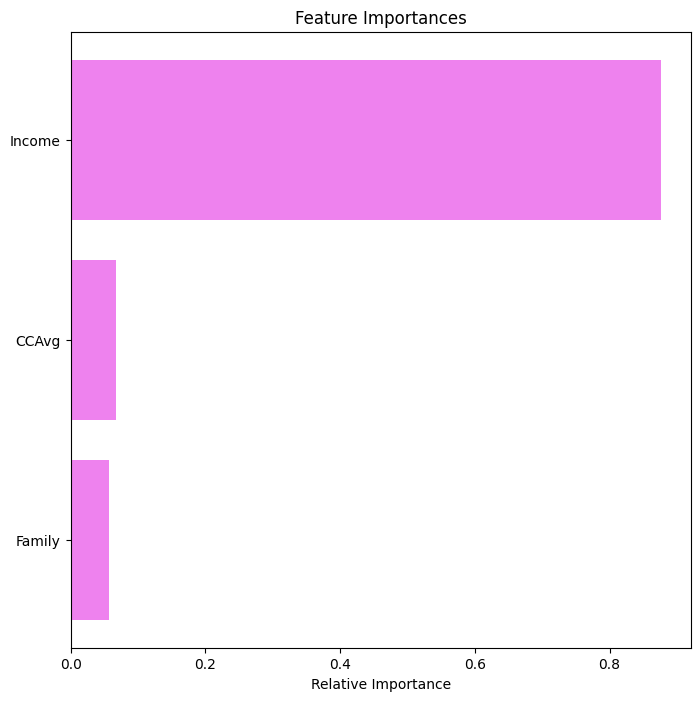

In [ ]:
# Export the Gini importance values of each feature from the pre pruned Decision Tree model
importances = dtree2.feature_importances_
indices = np.argsort(importances) # Order from highest to lowest

# Filter both indices and importances to keep only non-zero values
non_zero_indices = indices[importances[indices] != 0]
non_zero_importances = importances[non_zero_indices]

# Create a figure to plot the feature importances on
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")

# Use the filtered arrays for plotting
plt.barh(range(len(non_zero_importances)), non_zero_importances, color="violet", align="center")
plt.yticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices])

plt.xlabel("Relative Importance")
plt.show()

This bar chart shows that the Pre Pruned Decision Tree model is very simple, only considering Income, CCAVg and Family as relevant features when predicting if a customer will take on a Personal Loan or not.

The Education level, Age, presence of a CD Account and county a customer resides in and their use of Online banking services has no effect on the predictions made using the Pre Pruned Decision Tree model.

####Model Visualization (Pre Pruning)

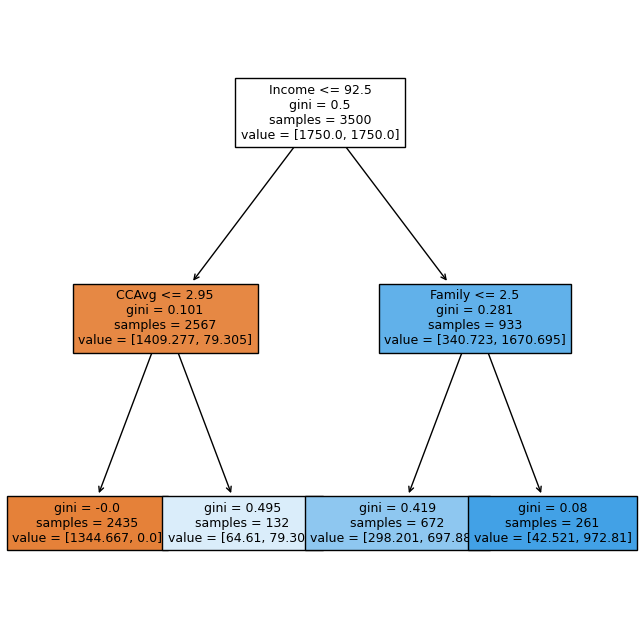

In [ ]:
# Create a figure to plot the decision tree visualization on
plt.figure(figsize=(8, 8))

# Plotting the pre pruned decision tree
tree.plot_tree(dtree2, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None);

In [ ]:
# Printing a text report showing the rules of the pre pruned decision tree
print(tree.export_text(dtree2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



The visualization of the Pre-Pruned Decision Tree is far simpler than the original Decision Tree, with only 2 layers and 4 final leaf nodes.

The hyperparameters set prior to model training have limited both the number of layers of the Decision Tree, and the number of nodes generated per layer through fewer splits.

This decision tree first splits all customers based on whether or not they have an income of <=\$92.5k. After this, they then split each group by one additional factor to predict if they are lilely to accept a Personal Loan or not:
* For customers with incomes >\$92.5k, the model then checks if the customer has a monthly credit card spend of <=\$2.95k to determine if they will accept a personal loan or not.
* For customers with incomes <=$\92.5k, the model then checks if the customer has a family size of <=2.5 members to determine if they will accept a personal loan or not.

This gives us a very simple decision tree that could be easy for a bank clerk to follow without the aid of a program or code. However, there are high levels of impurity in some of the leaf nodes, so may not be appropriate if the bank wishes to also avoid excessive False Positive outcomes.


###Post-Pruning

A second approach to improving the performance of the Decision Tree is to permit an initial model to be created without any hyperparameter restrictions applied, then to simplify the Decision Tree by pruning unnecessary branches which result in a reduction in model complexity and an increase in model performance.

This is known as **Post-Pruning**. A complexity cost is calculated and assigned to each path in the decision tree, and branches pruned based on their impact to this complexity cost (effective alphas) and performance (impurities).

####Model Building (Post Pruning)

In [ ]:
# Post Pruning begins by creating a full, unpruned decision tree
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# A cost complexity pruning path for the model is created using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# The array of effective alphas and impurity scores for each leaf or branch pruned is extracted from the pruning path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

First a full Decision Tree model will be been allowed to develop.

The impact of pruning each leaf or branch from the tree is then assigned an effective alpha value, calculated as the increase in impurity generated for each leaf or branch pruned.

$α=\frac{Error\ (Pruned)\ -\ Error\ (Original)}{Number\ of\ nodes\ reduced}$

This code calculates a cost complexity pruning path, defined as the sequence of leaves and branches to prune starting with those that generate the lowest alpha value.

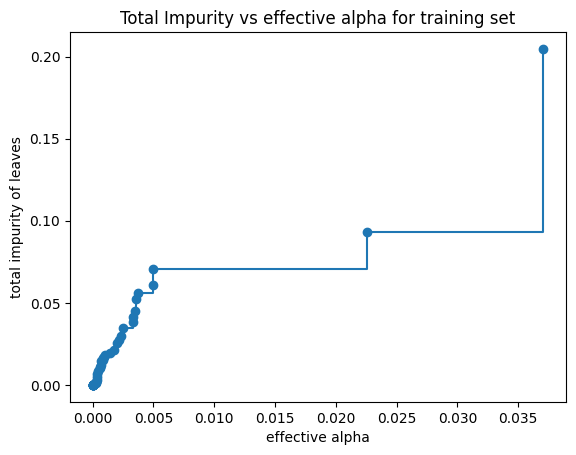

In [ ]:
# Visualizing the increase in model impurity as effective alpha score increases
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

The graphic demonstrates the increase in alpha and impurity for each leaf or branch pruned from the Decision Tree, following the cost complexity path of starting with leaves that have the lowest effective alpha (the lowest impact on model impurity when pruned).

Once a pruning path is created, a series of post-pruned decision trees can be trained on the training data, each with different levels of alpha applied.

In [ ]:
# Initialize a list to hold post-pruned Decision Tree models
clfs = []

# Create a new decision tree model for each alpha value identified in the pruning path and add to list
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Report ccp_alpha value in last model created, which will be a fully pruned tree with only a single node
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992325


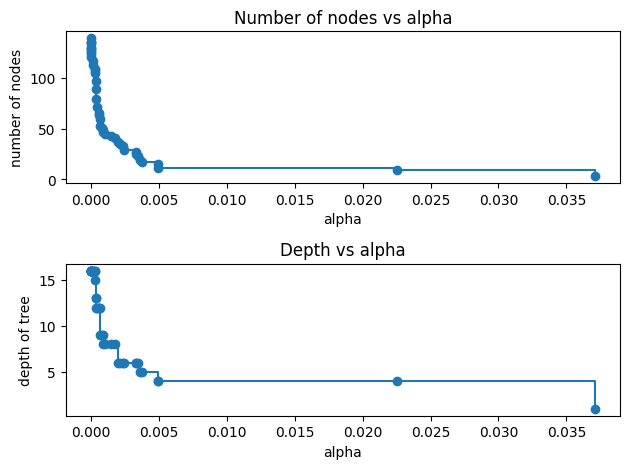

In [ ]:
# Amend the list of models and alphas to remove the last trivial model with a single node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes and depth of each pruned Decision Tree model
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Create subplots showing node counts and depth of each pruned model
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The graphic demonstrates that, as alpha approaches 0.05, both the number of nodes and depth of the post-pruned decision trees reduces drastically. Beyond this point, there is only an incremental decrease in complexity for larger increases in alpha.

Now that a series of post-pruned decision trees has been trained, their effectiveness at predicting results on the training data and test data sets can be evaluated.

In [ ]:
# Iterate through post-pruned models and list their Recall against training data set
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

# Iterate through post-pruned models and list their Recall against test data set

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

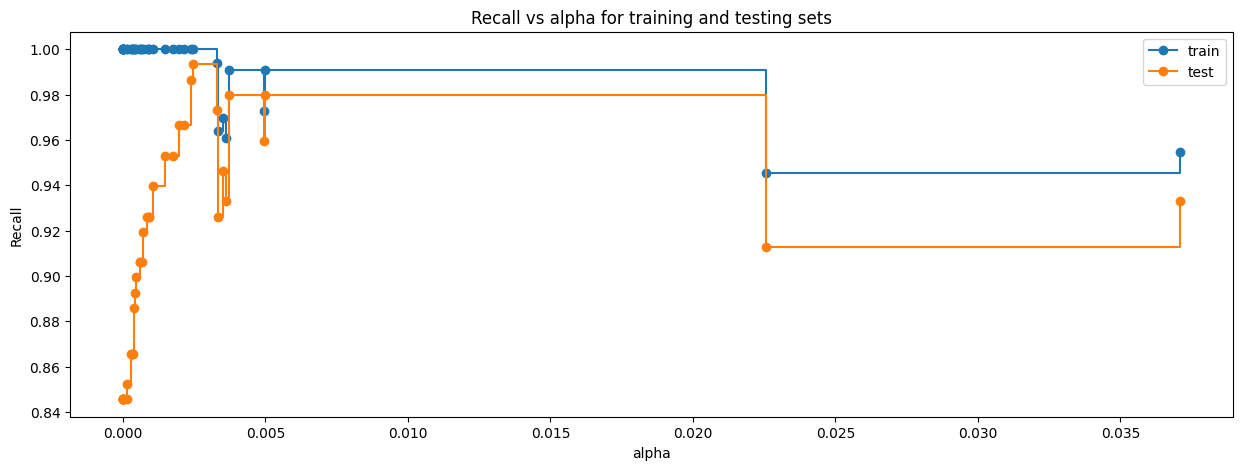

In [ ]:
# Plot Recall effectiveness of post-pruned models against training and test data sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

From the diagram, it can be observed that the level of Recall for the test data set increases as alpha increases to a certain point, before beginning to drop off.

This demonstrates that the original unpruned Decision Tree was overfitting the training data set, reducing its effectiveness at predicting True Positives on the test data set.

By simplying the Decision Tree through post pruning at increasing levels of alpha, overfitting is reduced and the post pruned decision tree becomes more effective than the unpruned decision tree at predicing on unseen data sets.

However, it should be noted that for excessive levels of alpha, the Recall score of the post pruned decision tree falls below that of the unpruned Decision Tree. This is because excessive pruning can remove key leaves and branches, reducing its effectiveness at prediction.

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002472659878642246, class_weight='balanced',
                       random_state=1)


Based on the Recall test, the most effective decision tree model is one with an alpha score of 0.002472659878642246.

In [ ]:
# Build a post pruned decision tree with an optimal alpha that maximizes test datta Recall, and fit to training data
dtree3 = DecisionTreeClassifier(ccp_alpha=0.002472659878642246, random_state=1, class_weight="balanced")
dtree3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002472659878642246, class_weight='balanced',
                       random_state=1)

####Model Performance (Post Pruning)

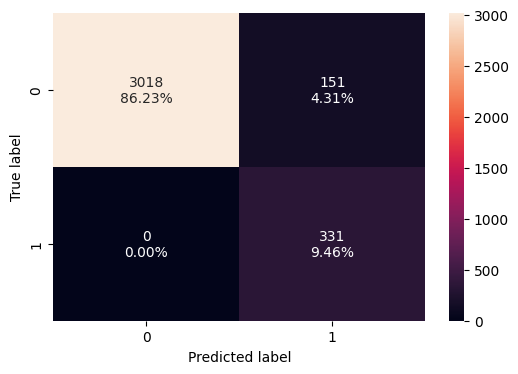

In [ ]:
# Create a confusion matrix to show post-pruned model performance in predicting the Personal_Loan value in the training data set
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
# Display the performance metrics of the post-pruned decision tree in predicting the Personal_Loan value in the training data set
dtree3_train_perf = model_performance_classification(dtree3, X_train, y_train)
dtree3_train_perf

Accuracy  Recall  Precision        F1
0  0.956857     1.0   0.686722  0.814268

On the training data set, the post-pruned Decision Tree Model selected with an alpha value of 0.00247 predicted 151 False Positives but 0 False Negatives. It also showed a Recall score of 1.0, identical to the Recall score achieved by the unpruned Data Model and higher than the 0.98 Recall score achieved by the Pre-Pruned model.

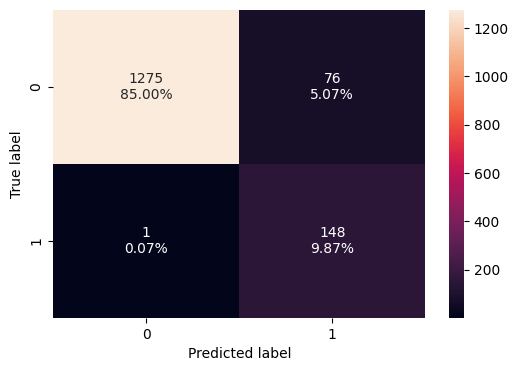

In [ ]:
# Create a confusion matrix to show post-pruned model performance in predicting the Personal_Loan value in the test data set
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
# Display the performance metrics of the post-pruned decision tree in predicting the Personal_Loan value in the test data set
dtree3_test_perf = model_performance_classification(dtree3, X_test, y_test)
dtree3_test_perf

Accuracy    Recall  Precision        F1
0  0.948667  0.993289   0.660714  0.793566

On the training data set, the post-pruned Decision Tree Model selected with an alpha value of 0.00247 predicted 76 False Positives and only 1 False Negative. It showed a Recall score of 0.99, significantly higher than that achieved by either the Pre-Pruned or unpruned Decision Trees.

#### Feature Importance (Post Pruning)

In [ ]:
# Output a DataFrame showing the Gini importance of each variable in the post pruned Decision Tree

print(
    pd.DataFrame(
        dtree3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.668840
Education_2                    0.146614
CCAvg                          0.083952
Education_3                    0.051622
Family                         0.040954
CD_Account                     0.008018
Age                            0.000000
county_Santa Clara County      0.000000
county_San Benito County       0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Joaquin County      0.000000
county_San Luis Obispo County  0.000000
county_San Mateo County        0.000000
county_Santa Barbara County    0.000000
county_Siskiyou County         0.000000
county_Santa Cruz County       0.000000
county_Shasta County           0.000000
county_Riverside County        0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Stanislaus County       0.000000
county_Trinity County          0.000000


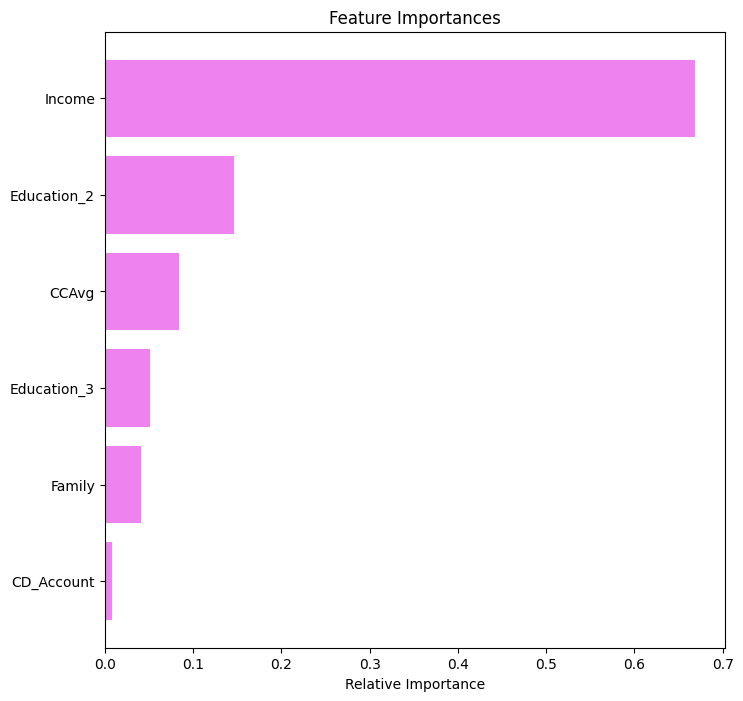

In [ ]:
# Export the Gini importance values of each feature from the post pruned Decision Tree model
importances = dtree3.feature_importances_
indices = np.argsort(importances) # Order from highest to lowest

# Filter both indices and importances to keep only non-zero values
non_zero_indices = indices[importances[indices] != 0]
non_zero_importances = importances[non_zero_indices]

# Create a figure to plot the feature importances on
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")

# Use the filtered arrays for plotting
plt.barh(range(len(non_zero_importances)), non_zero_importances, color="violet", align="center")
plt.yticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices])

plt.xlabel("Relative Importance")
plt.show()

Like the unpruned decision tree, the Post Pruned Decision Tree considers Income and Education as amongst the most impactful features when predicting if a customer will take on a Personal Loan or not.

The total number of factors with any level of Relative Importance for the Post Pruned model is between those used by the unpruned and Pre-Pruned decision trees.

Like the Pre Pruned Model, the Post Pruned Model does not assign any importance to the Mortgage, Age or location factors. However, the Post Pruned model still assigns some importance to Education and presence of a CD Account, similar to that of the unpruned model.

####Model Visualization (Post Pruning)

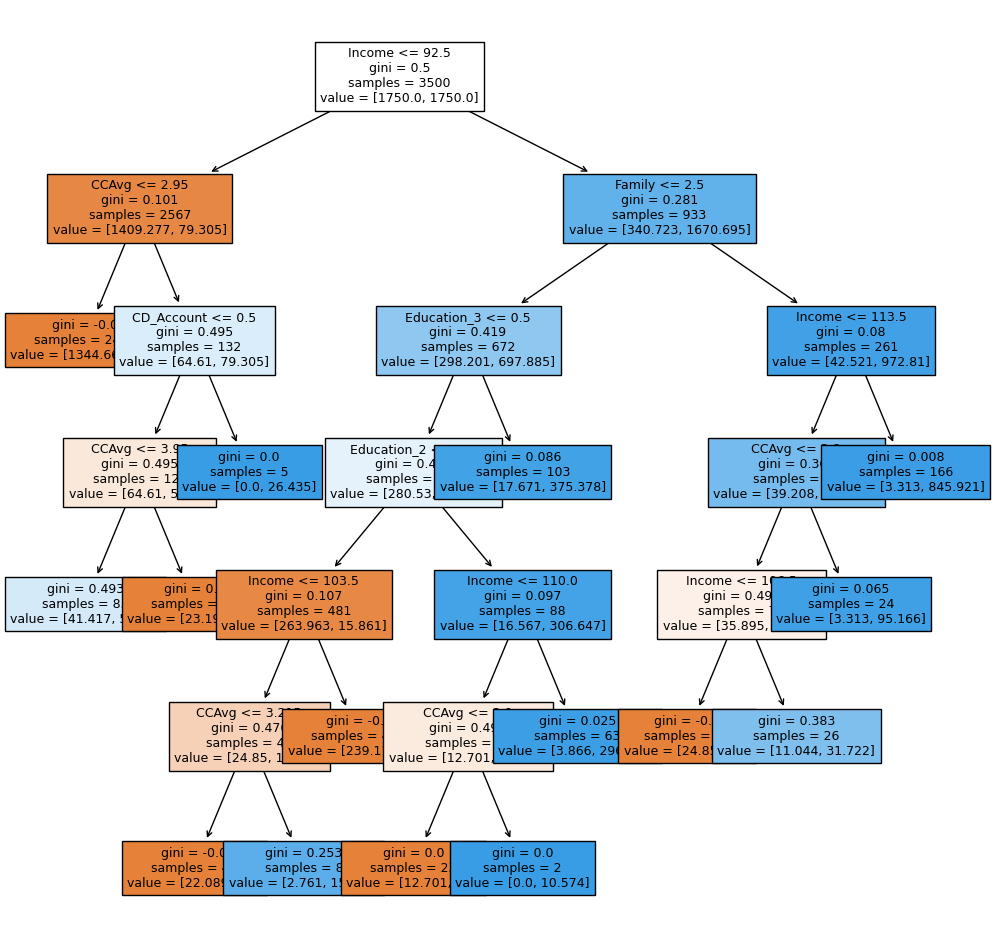

In [ ]:
# Create a figure to plot the decision tree visualization on
plt.figure(figsize=(12, 12))

# Plotting the post pruned decision tree
tree.plot_tree(dtree3, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None);

In [ ]:
# Printing a text report showing the rules of the post pruned decision tree
print(tree.export_text(dtree3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

The Post Pruned Decision Tree model visualization has a middle level of complexity when compared to the unpruned and pre-pruned models, being made up of 6 layers. This is still significantly less than the number of layers generated by the unpruned decision tree.

The first two layers of the post pruned decision tree split customers based on the same factors as the pre pruned decision tree, starting with evaluating income before splitting the groups further based on either monthly credit card spend or family size. The thresholds for each node are even identical between the pre pruned and post pruned models for the first two layers.

However, beyond these first two layers, the post pruned decision tree model differs from the pre pruned model by splitting customers further based on factors such as Education and presence of a CD Account.

Ultimately, this leads to a reduction in overall Recall when applying the post pruned model in comparison to the Recall score achieved by the pre pruned model. This suggests there is still some level of overfitting being applied by the post pruned model.

## Model Performance Comparison and Final Model Selection

Now that three models have been created, the final model can be selected for use based on their Recall performance criteria that was calculated for each model.

In [ ]:
# Create a DataFrame consolidating performance metrics of each model created on training data

models_train_comp_df = pd.concat(
    [dtree1_train_perf.T, dtree2_train_perf.T, dtree3_train_perf.T], axis=1,
)
models_train_comp_df.columns = ["sklearn default", "Pre-Pruning", "Post-Pruning"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


sklearn default  Pre-Pruning  Post-Pruning
Accuracy               1.0     0.790286      0.956857
Recall                 1.0     1.000000      1.000000
Precision              1.0     0.310798      0.686722
F1                     1.0     0.474212      0.814268

All three models achieve a perfect Recall value of 1.0 on the training data, as expected. The performance of each model on unseen test data is more important when selecting a model for future use.

In [ ]:
# Create a DataFrame consolidating performance metrics of each model created on test data

models_test_comp_df = pd.concat(
    [dtree1_test_perf.T, dtree2_test_perf.T, dtree3_test_perf.T], axis=1,
)
models_test_comp_df.columns = ["sklearn default", "Pre-Pruning", "Post-Pruning"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


sklearn default  Pre-Pruning  Post-Pruning
Accuracy          0.984667     0.779333      0.948667
Recall            0.906040     1.000000      0.993289
Precision         0.937500     0.310417      0.660714
F1                0.921502     0.473768      0.793566

Based solely on the **Recall score** of each model with regard to their performance on unseen test data, the **Pre Pruned Decision Tree model (dtree2)** is the most appropriate model for use in the marketing campaign.
* The pre pruned decision tree achieved a 100% success rate in detecting True Positives and avoiding False Negatives on the unseen test data set.
* This suggests the model will always identify appropriate candidates for Personal Loans as part of AllLife Bank's new marketing campaign.

However, it was noted that the pre pruned decision tree model achieved the lowest Accuracy, Precision and F1 scores across the three models, suggesting that a large number of inappropriate customers with no interest in personal loans would also be targeted for marketing by this model.
* If AllLife bank wished to reduce the level of False Positives while attempting to target as many candidate customers as possible, then the **Post Pruned Decision Tree model (dtree3)** may be a good compromise, as it achieves a Recall of 0.993 while improving Accuracy, Precision and F1 score in comparison to the pre pruned decision tree model.

The **Unpruned Decision Tree model (dtree1)** is not an appropriate model selection, as it only achieves a Recall score of 0.906. Some candidate customers would be missed if AllLife Bank used this to drive their marketing campaign.

## Actionable Insights and Business Recommendations


The Pre Pruned Decision Tree built for AllLife Bank was able to predict if a customer would take up a Personal Loan with the bank with perfect Recall on a sub set of the customer data.
* Based on the model, the only factors relevant to determining if a customer will accept a Personal Loan are Income, average monthtly Credit Card spend and Family size (in that order).
* If the incremental marketing costs of targeting inappropriate customers is high and also need to be reduced, the Post Pruned Decision Tree model may be an appropriate compromise.
  * This model would also require a customer's Education level and CD Account status to be taken into consideration.
* Mortgage balance, use of a Securities Account, use of Online services and ZIP code / location of customers do not appear to play any significant role in determining if a customer will accept a Personal Loan.
* A larger data sample could be provided to validate model performance.

The Pre Pruned Decision Model indicates that customers with an Income <=\$92.5k and a Family size of 2.5 or more members are most likely to accept a Personal Loan with the Bank.
* The Marketing department should craft their marketing materials to appeal to lower income customers with large families, such as heads of household with many family dependents to support.

The model could be further improved if the default history and credit score of the customers was provided in future data sets.
* This would allow a model to be created that avoided targeting prospective customers which may default on their personal loans.
* Loan default is a very expensive event for the bank, and should be minimized by the model to avoid marketing loan services to high risk customers.



___

In [ ]:
#Final code to convert this.ipynb file to html for course submission
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Study_Materials/PGP-AIML/02.Machine_Learning/Project2_Personal_Loan_Campaign/DB_submission_AIML_ML_Project_full_code_notebook.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Study_Materials/PGP-AIML/02.Machine_Learning/Project2_Personal_Loan_Campaign/DB_submission_AIML_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] Writing 4954322 bytes to /content/drive/MyDrive/Study_Materials/PGP-AIML/02.Machine_Learning/Project2_Personal_Loan_Campaign/DB_submission_AIML_ML_Project_full_code_notebook.html
